[View in Colaboratory](https://colab.research.google.com/github/brishtiteveja/coinalysis/blob/master/Neural_networks_for_algorithmic_trading.ipynb)

# Neural networks for algorithmic trading. 
# Part 1. Simple time series forecasting


In [0]:
# kill all objects and remove tmp directory
  
!kill -9 1
!rm -rf /tmp/*

In [1]:
# installation of google-drive-ocamlfuse and others
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

# Google colab authorization
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

# Mounting drive
!mkdir -p drive
!google-drive-ocamlfuse drive

# Changing to directory
import os
os.chdir('drive/Projects/Crypto/Deep-Trading/simple_forecasting')
#!ls

gpg: keybox '/tmp/tmpz7i632zh/pubring.gpg' created
gpg: /tmp/tmpz7i632zh/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [2]:
# installation of python modules
!pip install --upgrade setuptools
!pip install pandas_datareader

# installation of deep learning libraries
!pip install -q keras
!pip install -q theano
!pip install torch torchvision
!pip install -q xgboost

# installation of pydrive
!pip install -U -q PyDrive

# install r-base
!apt-get install -y r-base

# install rpy2 for python2.7
# the most current version of rpy2 only works with python 3
!pip install https://pypi.python.org/packages/3d/9b/b76b3665936204e14174dcac4814d8c91c833e9c3164664d5e89d777dac5/rpy2-2.7.0.tar.gz
  

Requirement already up-to-date: setuptools in /usr/local/lib/python2.7/dist-packages (39.1.0)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
r-base is already the newest version (3.4.2-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
  Using cached https://pypi.python.org/packages/3d/9b/b76b3665936204e14174dcac4814d8c91c833e9c3164664d5e89d777dac5/rpy2-2.7.0.tar.gz
  Running setup.py bdist_wheel for rpy2 ... - \ | / - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/c5/ed/ea/201443776e4a2dd2d9910f9d38ade7c0792b56b7dc26de67d6
Successfully built rpy2


In [4]:
# Check rpy2 whether it loads R objects
import os
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri    
from rpy2.robjects.packages import importr

dir = '/content/drive/Projects/Crypto/BinanceData/'
os.chdir(dir)
f = os.listdir(dir)
rda_fn = 'Binance_tickers_all_1m_2018-04-17.Rda'

base = importr('base')
base.load(rda_fn)    
dfList = base.mget(base.ls())
dfList

<ListVector - Python:0x7f47c6f7fe18 / R:0x560dc1b722d8>
[ListVector]
<ListVector - Python:0x7f47c6f7fe18 / R:0x560dc1b722d8>
[ListVector]

In [0]:
# More Check for rpy2 object

ro = robjects.r
tcks = ro['tcks']
# 'ETHBTC trading'
print(ro.head(tcks[0]))
time = tcks[0][0]
open = tcks[0][1]
high = tcks[0][2]
low = tcks[0][3]
close = tcks[0][4]

import matplotlib.pyplot as plt
fig = plt.figure()

plt.plot(time, close)
plt.xlabel('time')
plt.ylabel('close price (USD)')
plt.show()

In [5]:
# OHLC plot function

import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from matplotlib.finance import candlestick2_ohlc

#plt.plot(t, df['Close'], marker='o', markersize=3, color = 'black', linewidth=0)

def plot_ohlc_data(df):
  fig, ax = plt.subplots()

  candlestick2_ohlc(ax, 
                  opens  = df['Open'], 
                  highs  = df['High'], 
                  lows   = df['Low'], 
                  closes = df['Close'],
                  width  = 0.6, 
                  colorup= 'green',
                  colordown = 'red')

  xdate = [datetime.datetime.fromtimestamp(i) for i in df.index.values]

  ax.xaxis.set_major_locator(ticker.MaxNLocator(6))

  def mydate(x,pos):
    try:
        return xdate[int(x)]
    except IndexError:
        return ''

  ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))

  fig.autofmt_xdate()
  fig.tight_layout()


  plt.show()
  
#plot_ohlc_data(df)


/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Binance_tickers_all_1d_2018-04-20.Rda
1
LTCBTC
Writing LTCBTC_15m_from_2018-2-25_to_2018-5-4.pkl


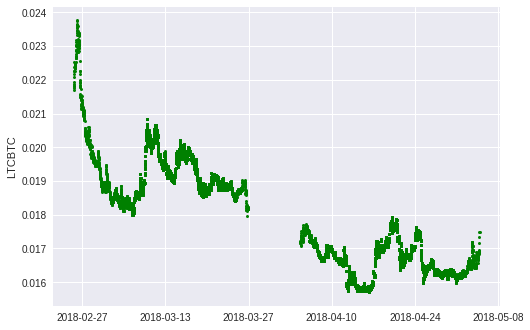

2
BNBBTC
Writing BNBBTC_15m_from_2018-2-25_to_2018-5-4.pkl


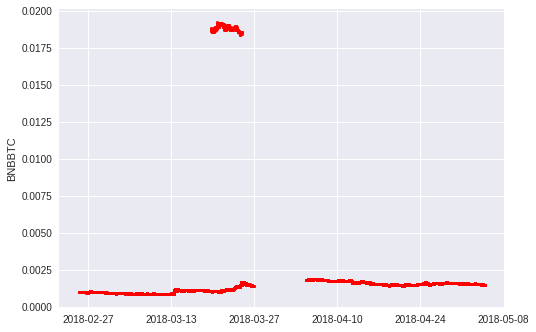

3
NEOBTC
Writing NEOBTC_15m_from_2018-2-25_to_2018-5-4.pkl


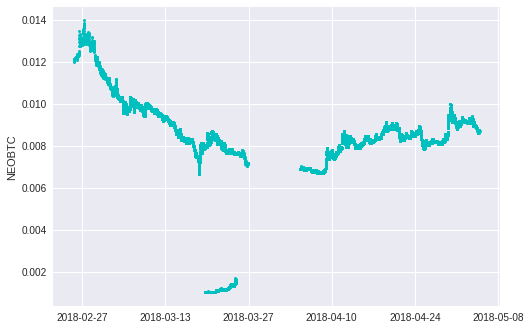

4
QTUMETH
Writing QTUMETH_15m_from_2018-2-25_to_2018-5-4.pkl


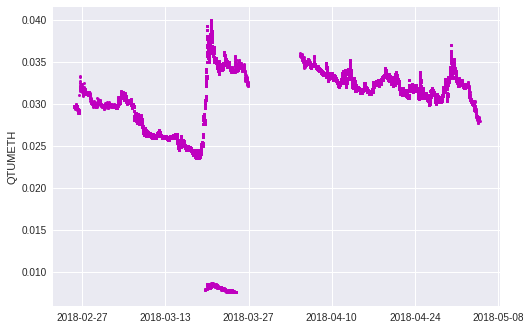

5
EOSETH
Writing EOSETH_15m_from_2018-2-25_to_2018-5-4.pkl


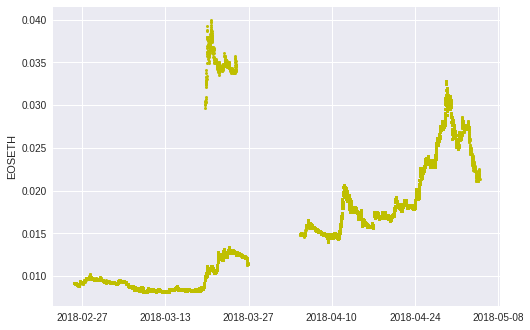

6
SNTETH
Writing SNTETH_15m_from_2018-2-25_to_2018-5-4.pkl


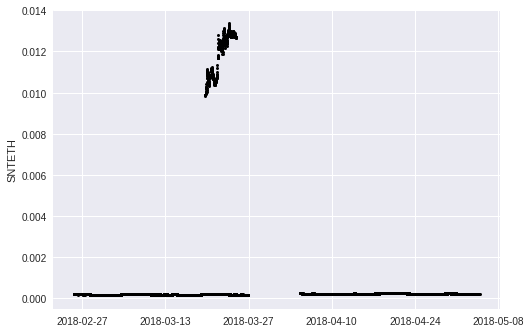

7
BNTETH
Writing BNTETH_15m_from_2018-2-25_to_2018-5-4.pkl


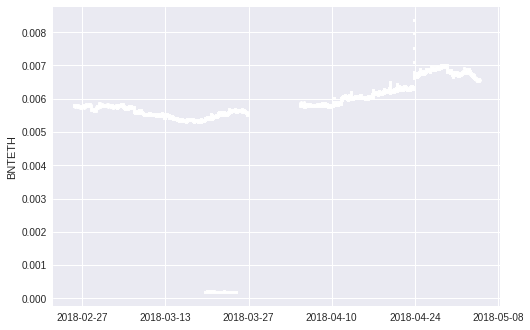

8
BCCBTC
Writing BCCBTC_15m_from_2018-2-25_to_2018-5-4.pkl


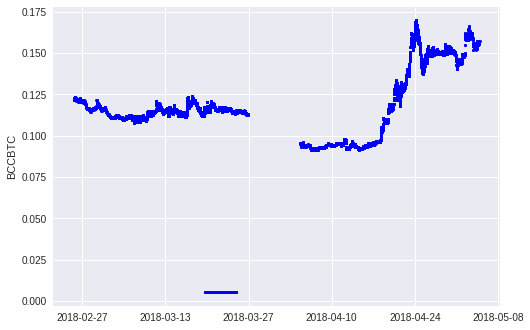

9
GASBTC
Writing GASBTC_15m_from_2018-2-25_to_2018-5-4.pkl


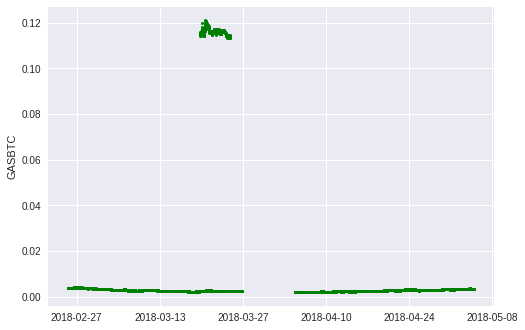

10
BNBETH
Writing BNBETH_15m_from_2018-2-25_to_2018-5-4.pkl


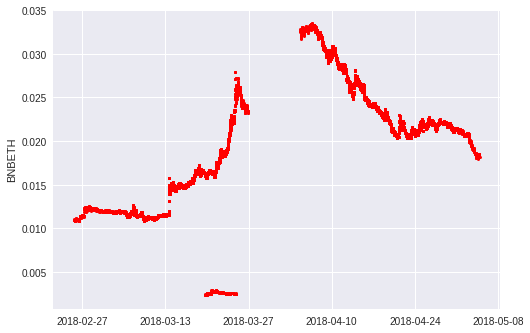

11
BTCUSDT
Writing BTCUSDT_15m_from_2018-2-25_to_2018-5-4.pkl


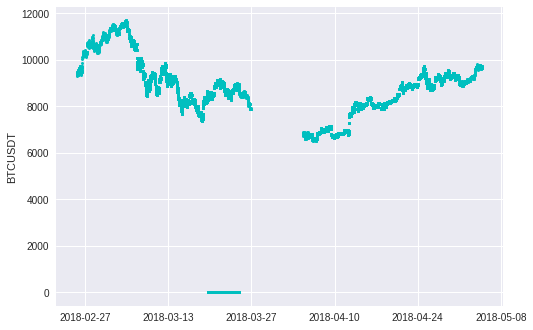

12
ETHUSDT
Writing ETHUSDT_15m_from_2018-2-25_to_2018-5-4.pkl


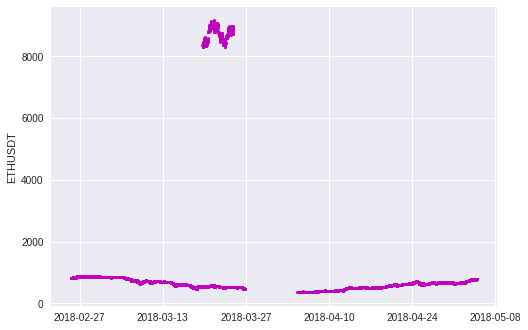

13
HSRBTC
Writing HSRBTC_15m_from_2018-2-25_to_2018-5-4.pkl


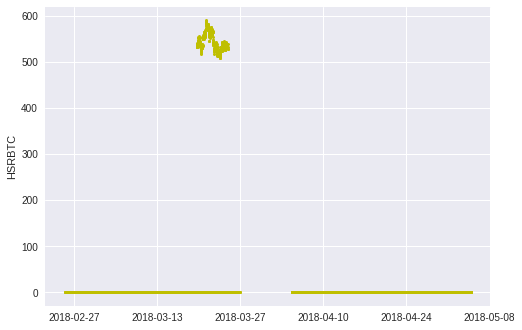

14
OAXETH
Writing OAXETH_15m_from_2018-2-25_to_2018-5-4.pkl


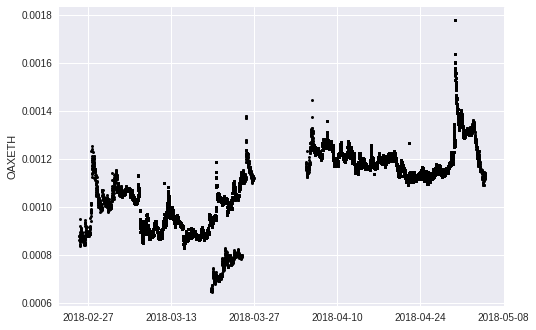

15
DNTETH
Writing DNTETH_15m_from_2018-2-25_to_2018-5-4.pkl


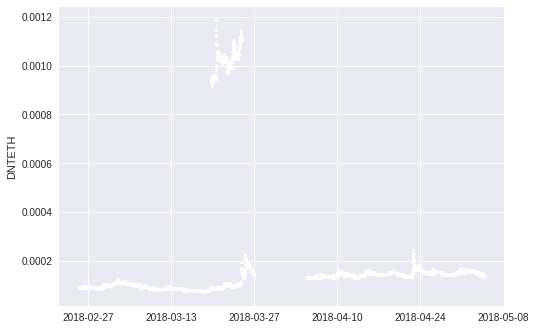

16
MCOETH
Writing MCOETH_15m_from_2018-2-25_to_2018-5-4.pkl


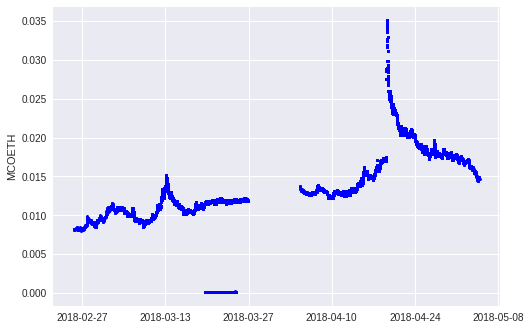

17
ICNETH
Writing ICNETH_15m_from_2018-2-25_to_2018-5-4.pkl


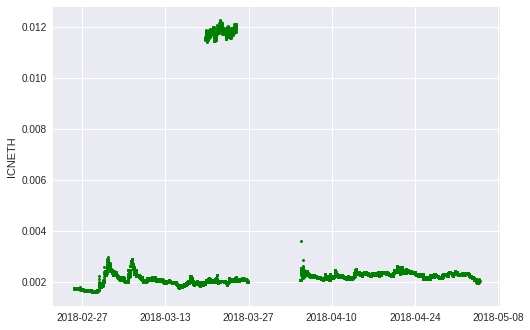

18
MCOBTC
Writing MCOBTC_15m_from_2018-2-25_to_2018-5-4.pkl


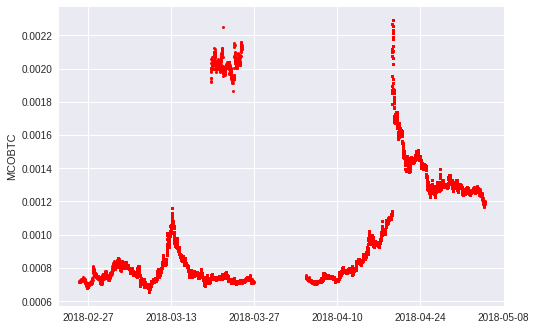

19
WTCBTC
Writing WTCBTC_15m_from_2018-2-25_to_2018-5-4.pkl


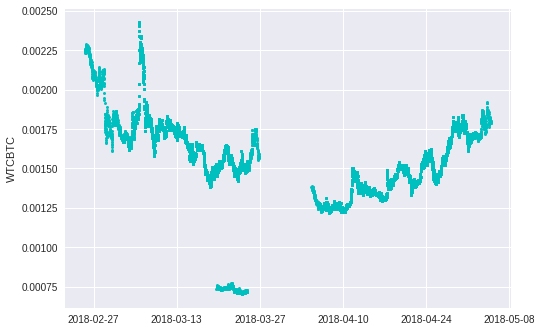

20
WTCETH
Writing WTCETH_15m_from_2018-2-25_to_2018-5-4.pkl


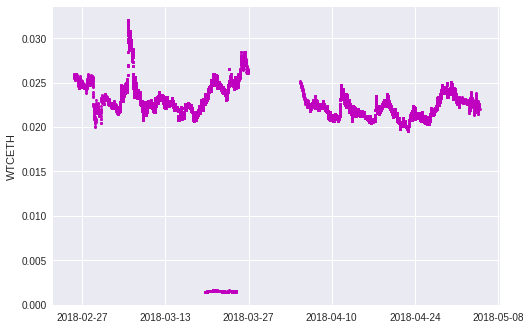

21
LRCBTC
Writing LRCBTC_15m_from_2018-2-25_to_2018-5-4.pkl


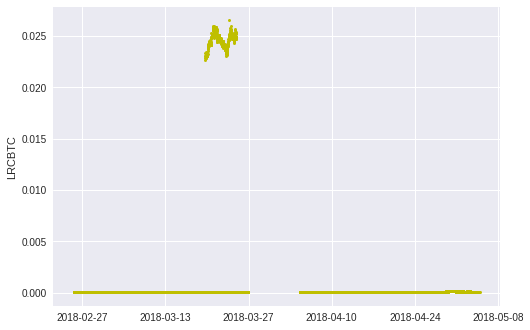

22
LRCETH
Writing LRCETH_15m_from_2018-2-25_to_2018-5-4.pkl


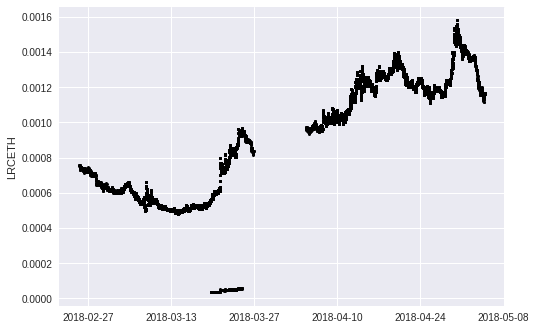

23
QTUMBTC
Writing QTUMBTC_15m_from_2018-2-25_to_2018-5-4.pkl


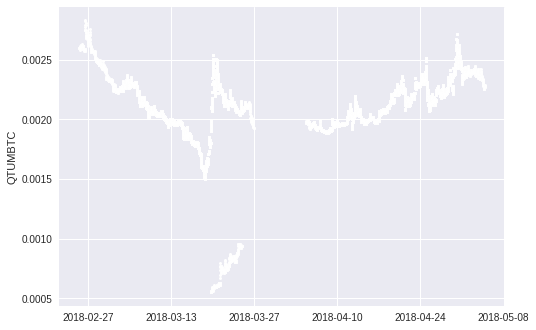

24
YOYOBTC
Writing YOYOBTC_15m_from_2018-2-25_to_2018-5-4.pkl


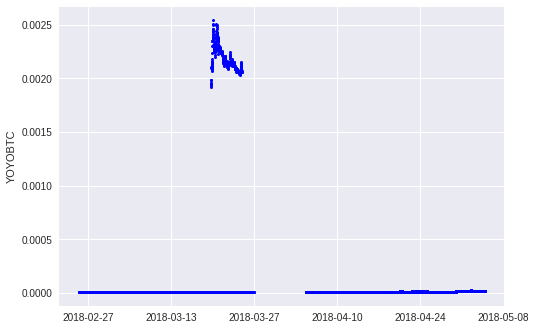

25
OMGBTC
Writing OMGBTC_15m_from_2018-2-25_to_2018-5-4.pkl


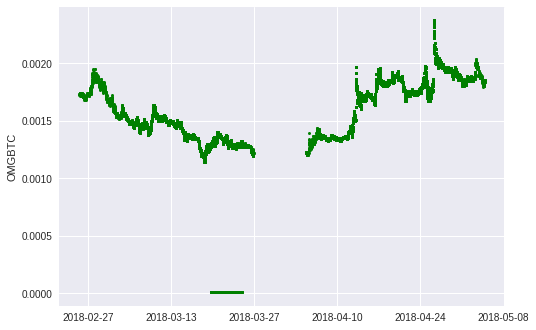

26
OMGETH
Writing OMGETH_15m_from_2018-2-25_to_2018-5-4.pkl


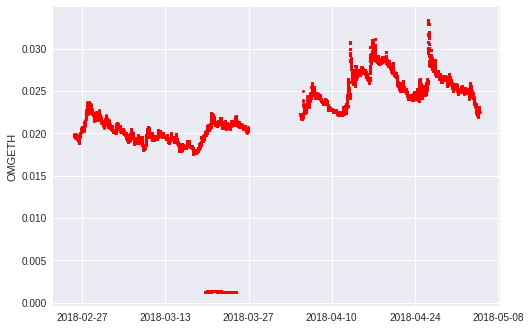

27
ZRXBTC
Writing ZRXBTC_15m_from_2018-2-25_to_2018-5-4.pkl


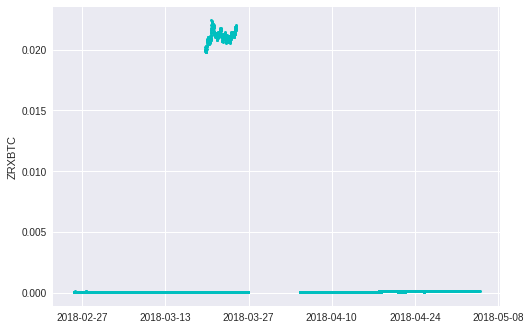

28
ZRXETH
Writing ZRXETH_15m_from_2018-2-25_to_2018-5-4.pkl


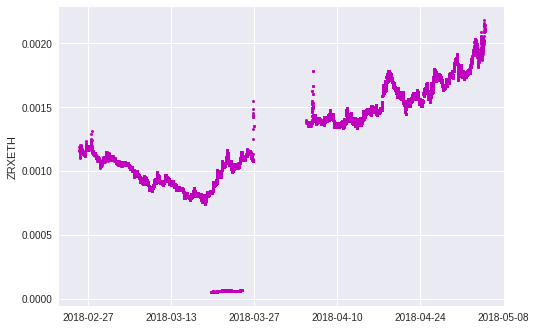

29
STRATBTC
Writing STRATBTC_15m_from_2018-2-25_to_2018-5-4.pkl


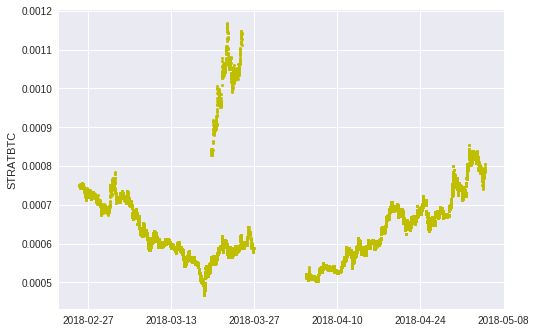

30
STRATETH
Writing STRATETH_15m_from_2018-2-25_to_2018-5-4.pkl


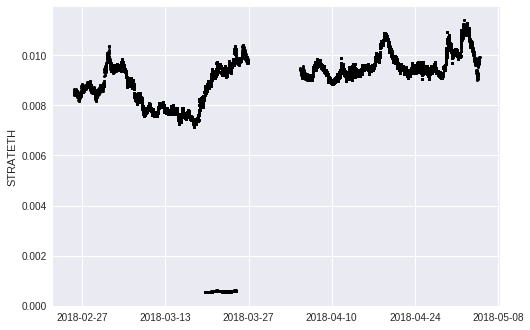

31
SNGLSBTC
Writing SNGLSBTC_15m_from_2018-2-25_to_2018-5-4.pkl


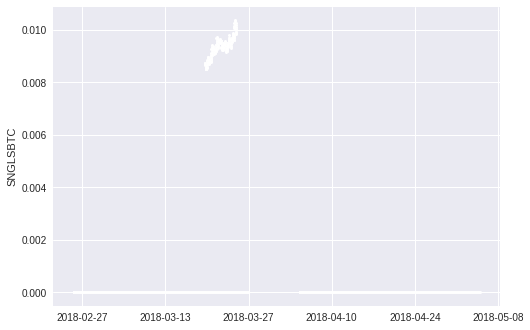

32
SNGLSETH
Writing SNGLSETH_15m_from_2018-2-25_to_2018-5-4.pkl


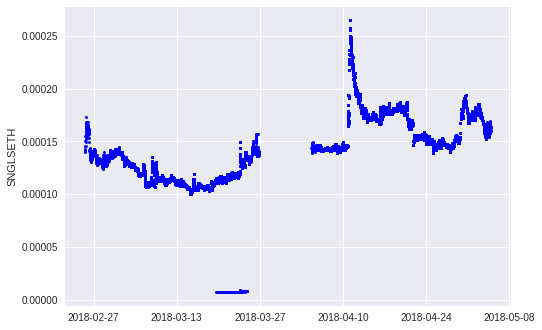

33
BQXBTC
Writing BQXBTC_15m_from_2018-2-25_to_2018-5-4.pkl


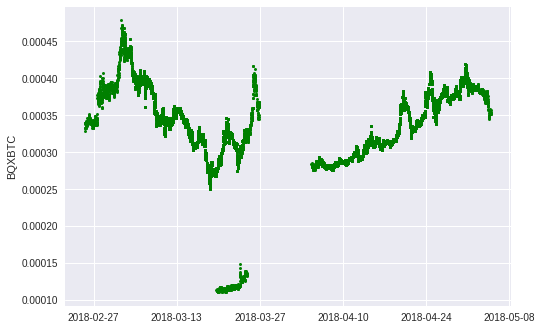

34
BQXETH
Writing BQXETH_15m_from_2018-2-25_to_2018-5-4.pkl


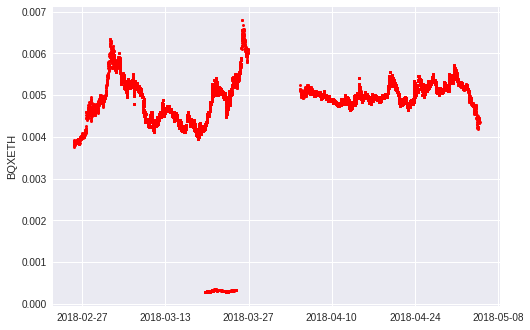

35
KNCBTC
Writing KNCBTC_15m_from_2018-2-25_to_2018-5-4.pkl


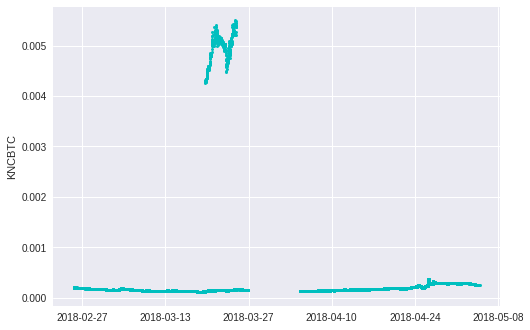

36
KNCETH
Writing KNCETH_15m_from_2018-2-25_to_2018-5-4.pkl


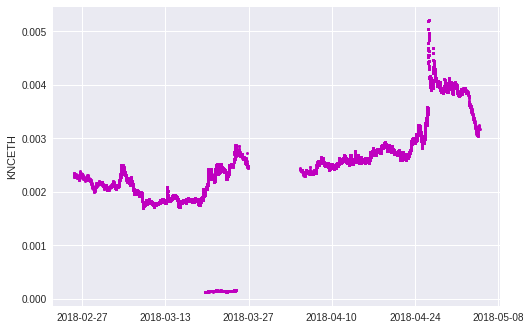

37
FUNBTC
Writing FUNBTC_15m_from_2018-2-25_to_2018-5-4.pkl


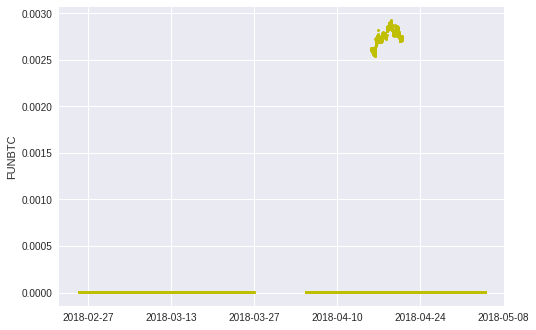

38
FUNETH
Writing FUNETH_15m_from_2018-2-25_to_2018-5-4.pkl


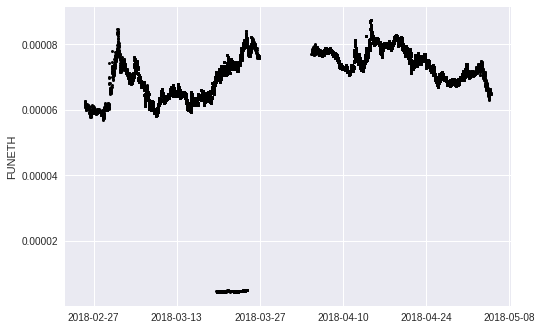

39
SNMBTC
Writing SNMBTC_15m_from_2018-2-25_to_2018-5-4.pkl


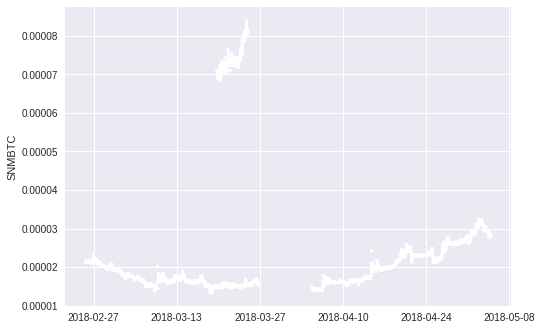

40
SNMETH
Writing SNMETH_15m_from_2018-2-25_to_2018-5-4.pkl


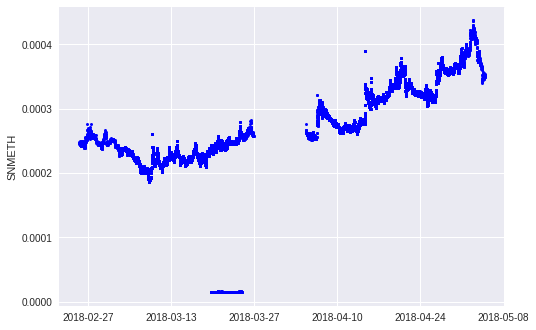

41
NEOETH
Writing NEOETH_15m_from_2018-2-25_to_2018-5-4.pkl


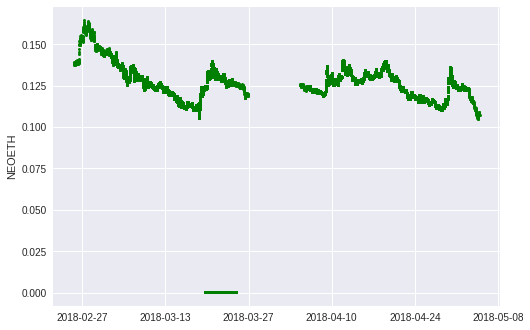

42
IOTABTC
Writing IOTABTC_15m_from_2018-2-25_to_2018-5-4.pkl


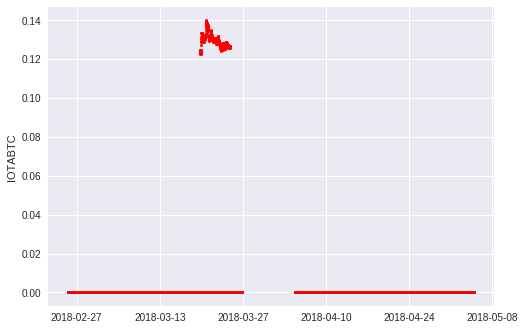

43
IOTAETH
Writing IOTAETH_15m_from_2018-2-25_to_2018-5-4.pkl


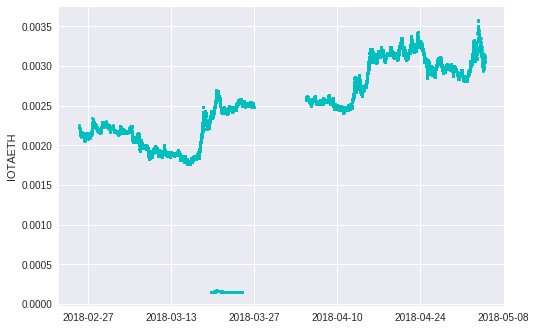

44
LINKBTC
Writing LINKBTC_15m_from_2018-2-25_to_2018-5-4.pkl


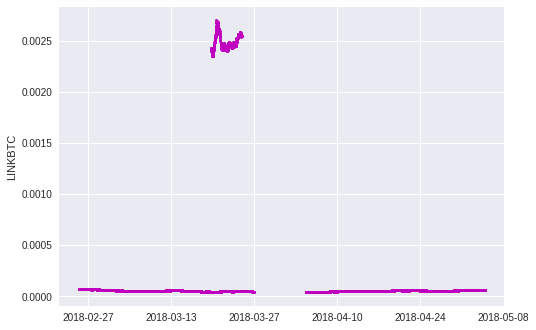

45
LINKETH
Writing LINKETH_15m_from_2018-2-25_to_2018-5-4.pkl


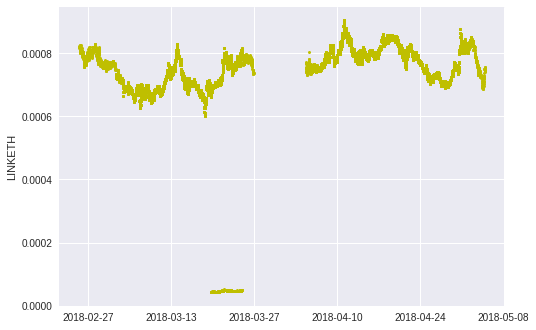

46
XVGBTC
Writing XVGBTC_15m_from_2018-2-25_to_2018-5-4.pkl


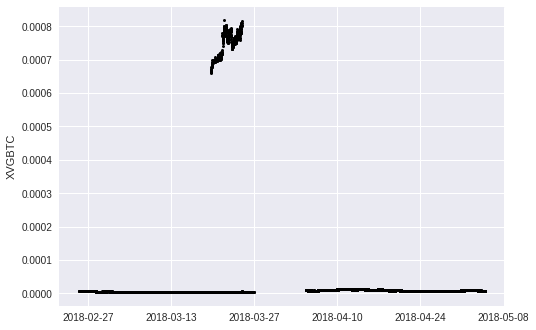

47
XVGETH
Writing XVGETH_15m_from_2018-2-25_to_2018-5-4.pkl


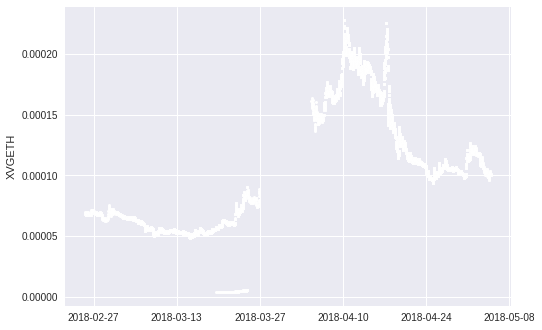

48
CTRBTC
Writing CTRBTC_15m_from_2018-2-25_to_2018-5-4.pkl


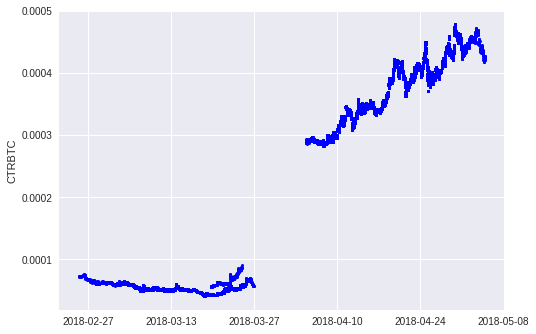

49
CTRETH
Writing CTRETH_15m_from_2018-2-25_to_2018-5-4.pkl


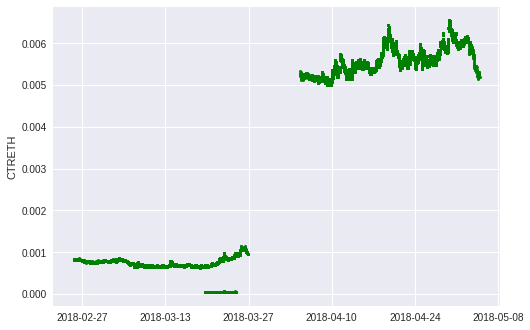

50
SALTBTC
Writing SALTBTC_15m_from_2018-2-25_to_2018-5-4.pkl


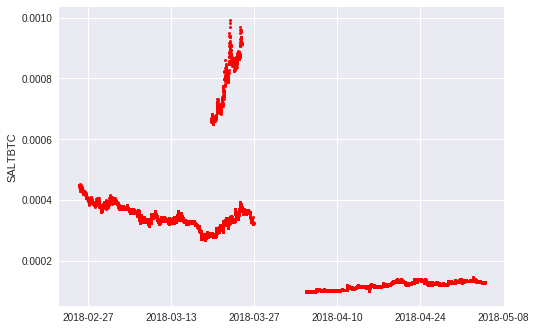

51
SALTETH
Writing SALTETH_15m_from_2018-2-25_to_2018-5-4.pkl


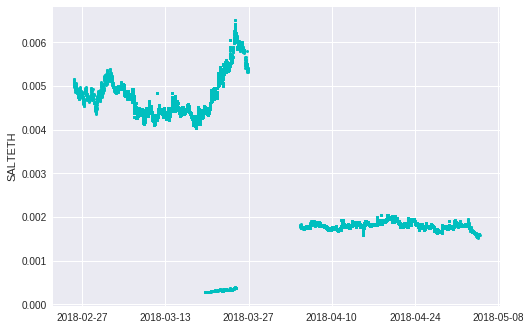

52
MDABTC
Writing MDABTC_15m_from_2018-2-25_to_2018-5-4.pkl


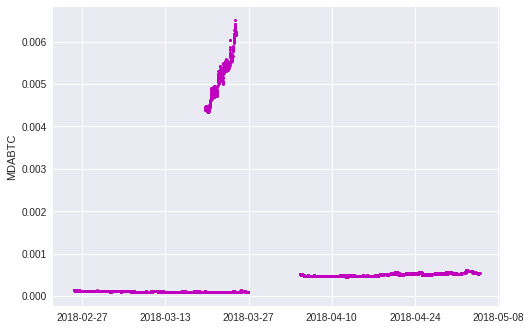

53
MDAETH
Writing MDAETH_15m_from_2018-2-25_to_2018-5-4.pkl


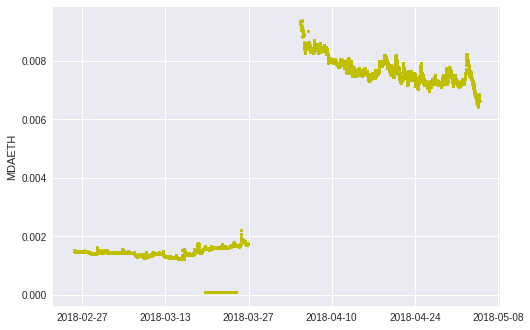

54
MTLBTC
Writing MTLBTC_15m_from_2018-2-25_to_2018-5-4.pkl


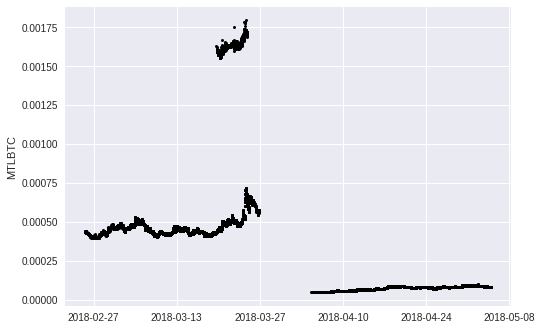

55
MTLETH
Writing MTLETH_15m_from_2018-2-25_to_2018-5-4.pkl


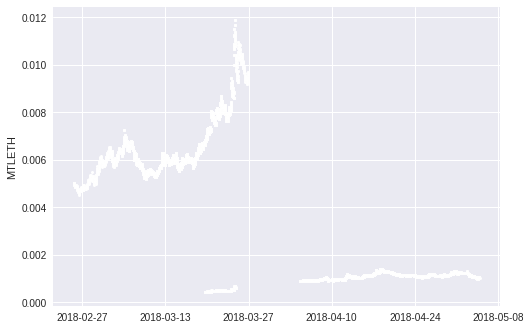

56
SUBBTC
Writing SUBBTC_15m_from_2018-2-25_to_2018-5-4.pkl


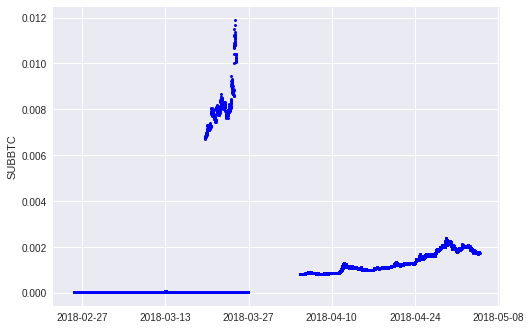

57
SUBETH
Writing SUBETH_15m_from_2018-2-25_to_2018-5-4.pkl


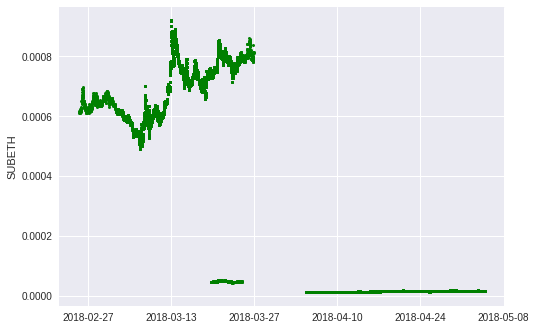

58
EOSBTC
Writing EOSBTC_15m_from_2018-2-25_to_2018-5-4.pkl


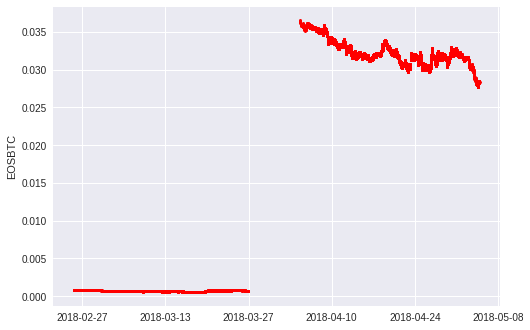

59
SNTBTC
Writing SNTBTC_15m_from_2018-2-25_to_2018-5-4.pkl


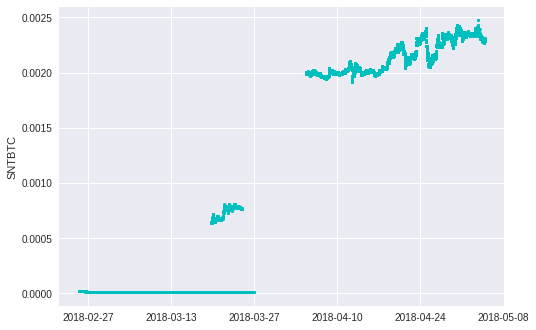

60
ETCETH
Writing ETCETH_15m_from_2018-2-25_to_2018-5-4.pkl


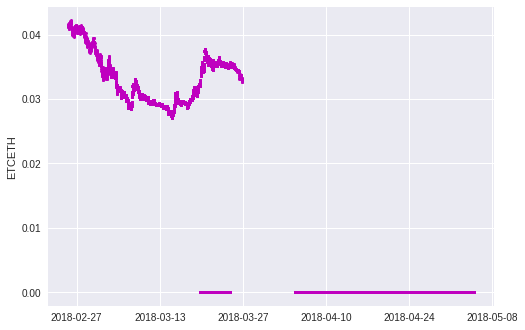

61
ETCBTC
Writing ETCBTC_15m_from_2018-2-25_to_2018-5-4.pkl


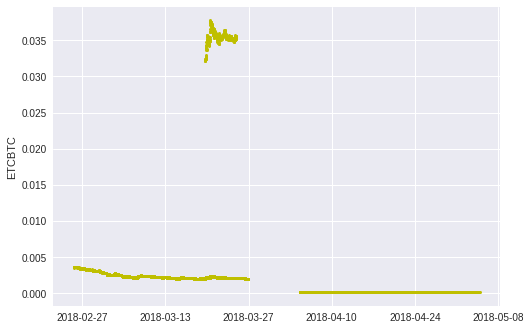

62
MTHBTC
Writing MTHBTC_15m_from_2018-2-25_to_2018-5-4.pkl


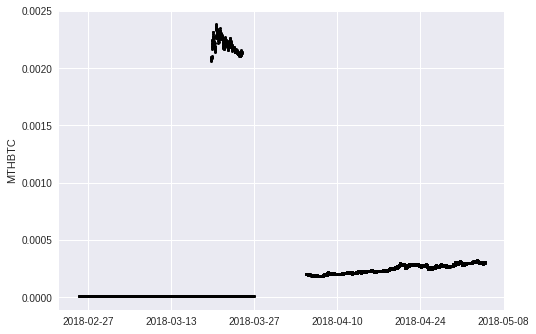

63
MTHETH
Writing MTHETH_15m_from_2018-2-25_to_2018-5-4.pkl


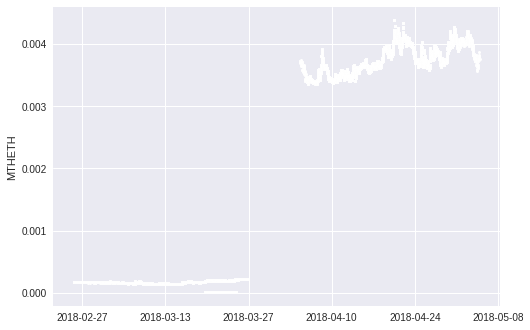

64
ENGBTC
Writing ENGBTC_15m_from_2018-2-25_to_2018-5-4.pkl


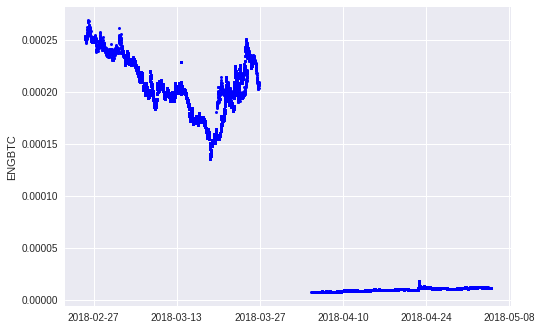

65
ENGETH
Writing ENGETH_15m_from_2018-2-25_to_2018-5-4.pkl


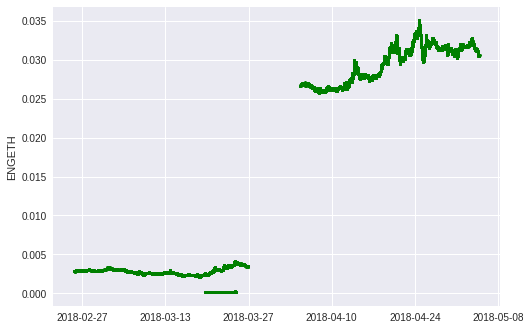

66
DNTBTC
Writing DNTBTC_15m_from_2018-2-25_to_2018-5-4.pkl


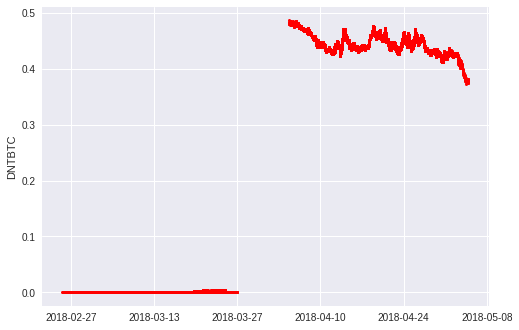

67
ZECBTC
Writing ZECBTC_15m_from_2018-2-25_to_2018-5-4.pkl


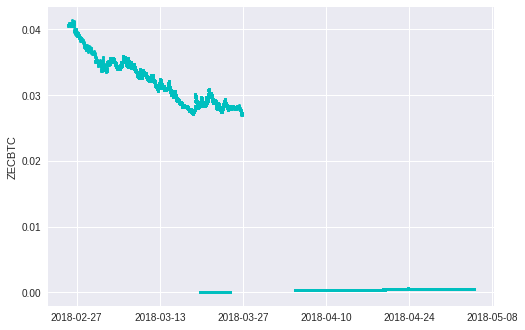

68
ZECETH
Writing ZECETH_15m_from_2018-2-25_to_2018-5-4.pkl


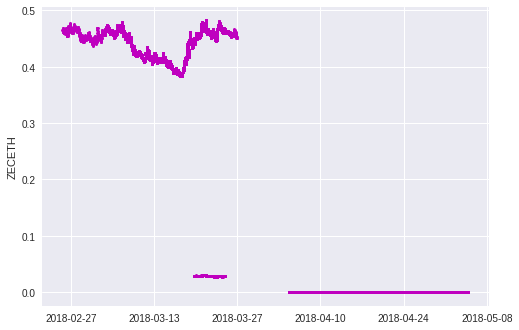

69
BNTBTC
Writing BNTBTC_15m_from_2018-2-25_to_2018-5-4.pkl


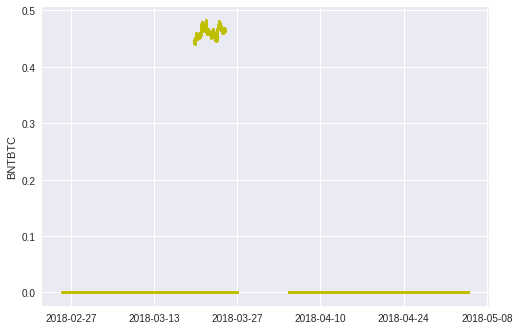

70
ASTBTC
Writing ASTBTC_15m_from_2018-2-25_to_2018-5-4.pkl


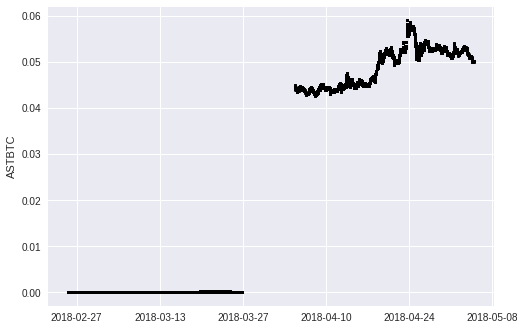

71
ASTETH
Writing ASTETH_15m_from_2018-2-25_to_2018-5-4.pkl


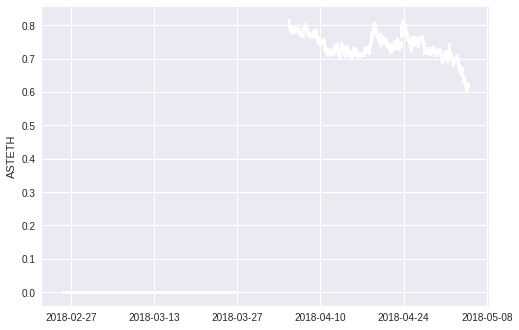

72
DASHBTC
Writing DASHBTC_15m_from_2018-2-25_to_2018-5-4.pkl


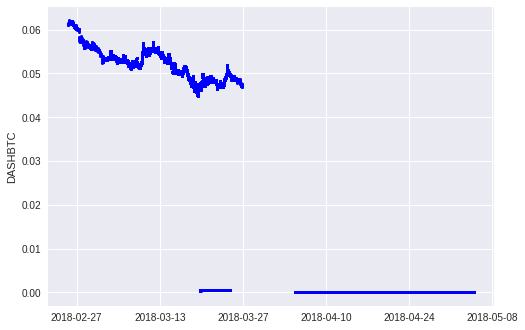

73
DASHETH
Writing DASHETH_15m_from_2018-2-25_to_2018-5-4.pkl


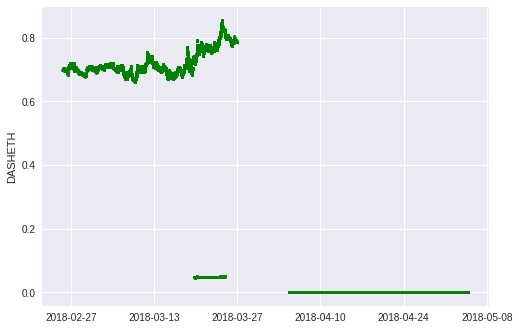

74
OAXBTC
Writing OAXBTC_15m_from_2018-2-25_to_2018-5-4.pkl


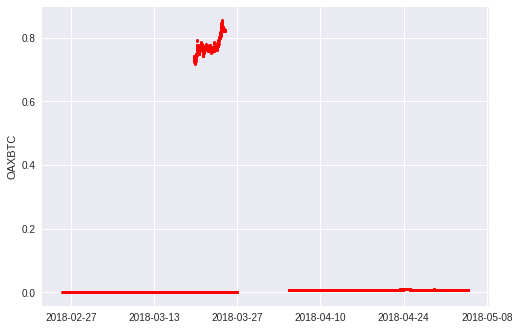

75
ICNBTC
Writing ICNBTC_15m_from_2018-2-25_to_2018-5-4.pkl


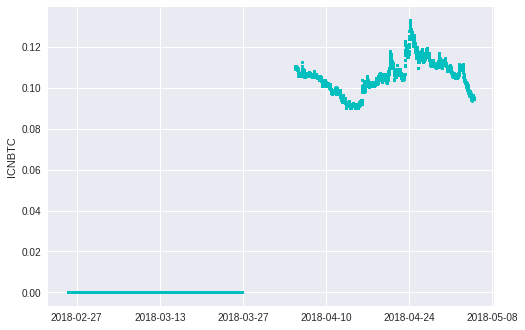

76
BTGBTC
Writing BTGBTC_15m_from_2018-2-25_to_2018-5-4.pkl


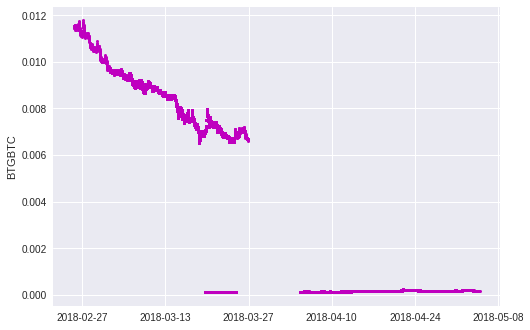

77
BTGETH
Writing BTGETH_15m_from_2018-2-25_to_2018-5-4.pkl


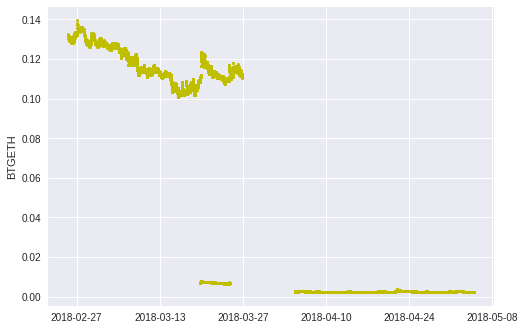

78
EVXBTC
Writing EVXBTC_15m_from_2018-2-25_to_2018-5-4.pkl


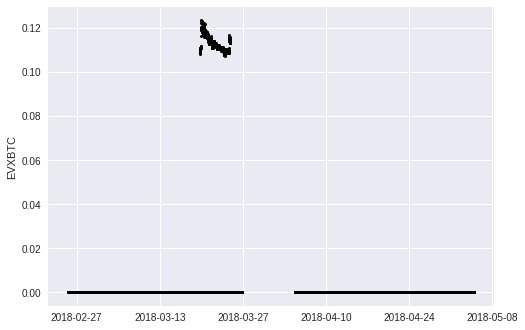

79
EVXETH
Writing EVXETH_15m_from_2018-2-25_to_2018-5-4.pkl


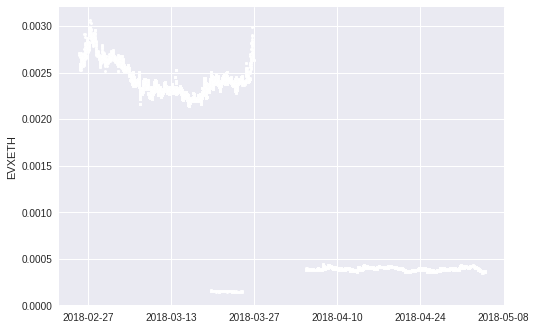

80
REQBTC
Writing REQBTC_15m_from_2018-2-25_to_2018-5-4.pkl


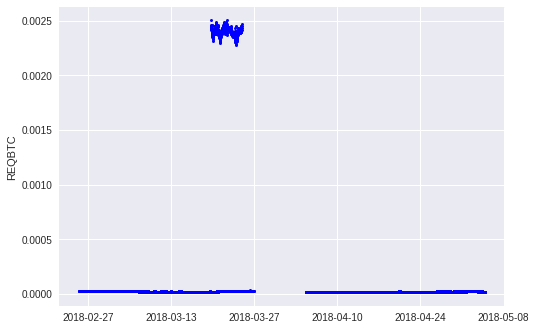

81
REQETH
Writing REQETH_15m_from_2018-2-25_to_2018-5-4.pkl


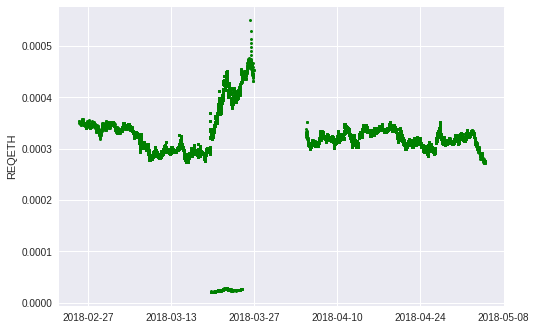

82
VIBBTC
Writing VIBBTC_15m_from_2018-2-25_to_2018-5-4.pkl


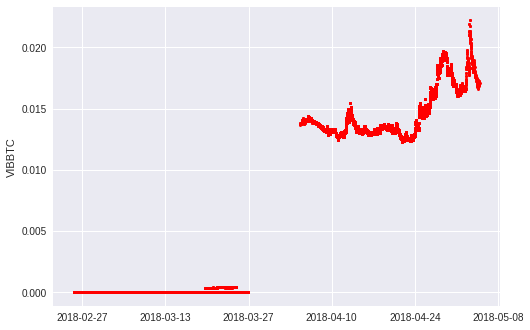

83
VIBETH
Writing VIBETH_15m_from_2018-2-25_to_2018-5-4.pkl


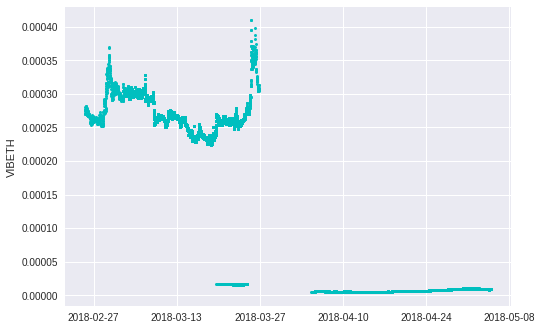

84
HSRETH
Writing HSRETH_15m_from_2018-2-25_to_2018-5-4.pkl


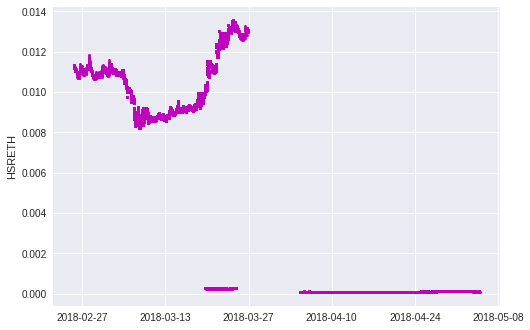

85
TRXBTC
Writing TRXBTC_15m_from_2018-2-25_to_2018-5-4.pkl


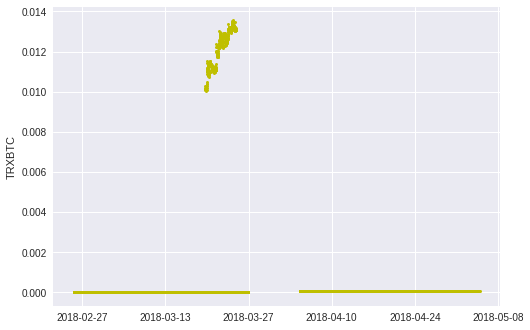

86
TRXETH
Writing TRXETH_15m_from_2018-2-25_to_2018-5-4.pkl


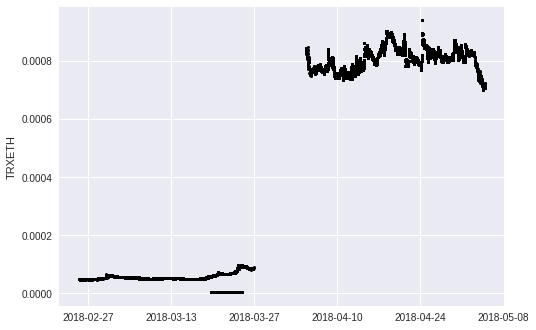

87
POWRBTC
Writing POWRBTC_15m_from_2018-2-25_to_2018-5-4.pkl


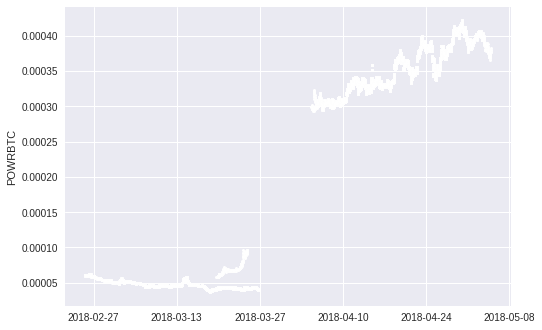

88
POWRETH
Writing POWRETH_15m_from_2018-2-25_to_2018-5-4.pkl


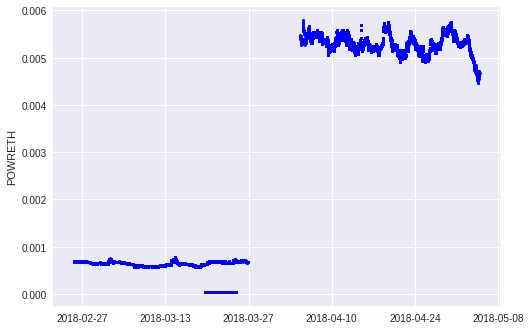

89
ARKBTC
Writing ARKBTC_15m_from_2018-2-25_to_2018-5-4.pkl


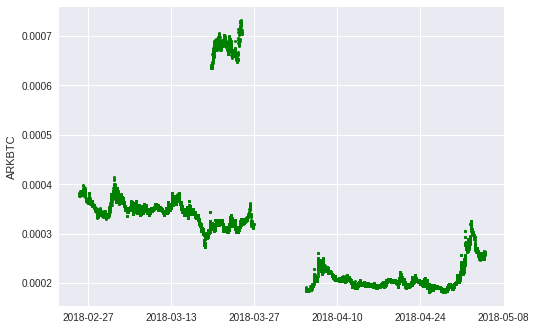

90
ARKETH
Writing ARKETH_15m_from_2018-2-25_to_2018-5-4.pkl


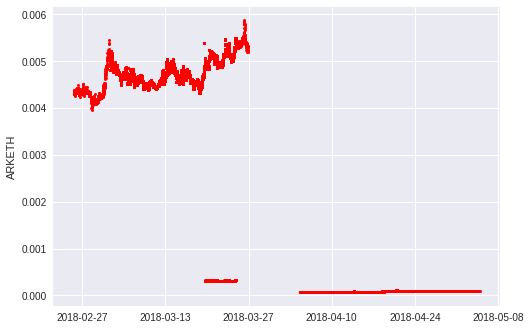

91
YOYOETH
Writing YOYOETH_15m_from_2018-2-25_to_2018-5-4.pkl


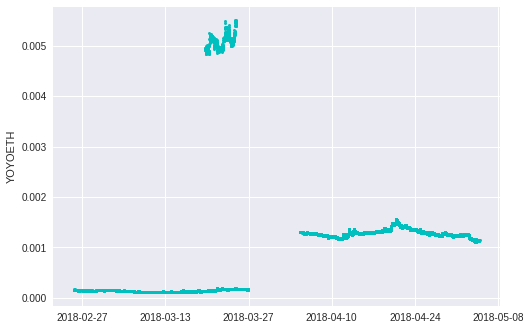

92
XRPBTC
Writing XRPBTC_15m_from_2018-2-25_to_2018-5-4.pkl


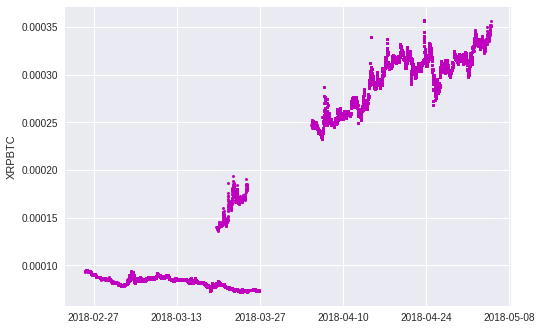

93
XRPETH
Writing XRPETH_15m_from_2018-2-25_to_2018-5-4.pkl


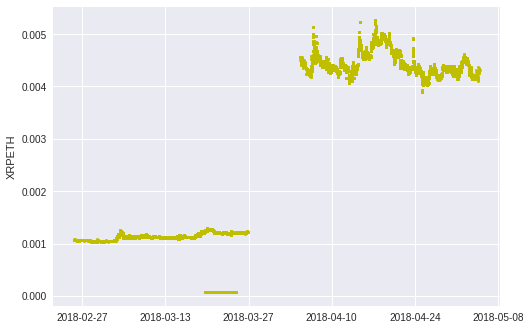

94
MODBTC
Writing MODBTC_15m_from_2018-2-25_to_2018-5-4.pkl


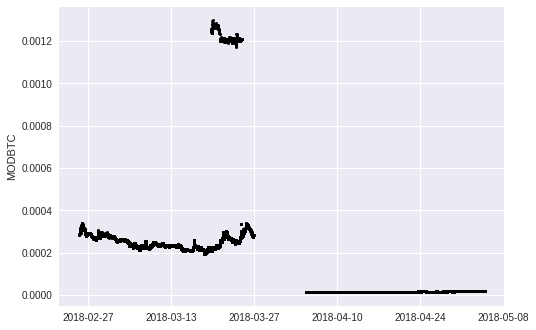

95
MODETH
Writing MODETH_15m_from_2018-2-25_to_2018-5-4.pkl


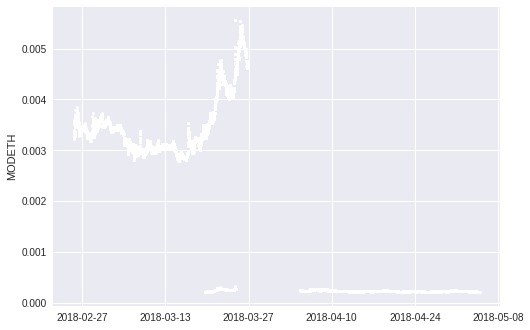

96
ENJBTC
Writing ENJBTC_15m_from_2018-2-25_to_2018-5-4.pkl


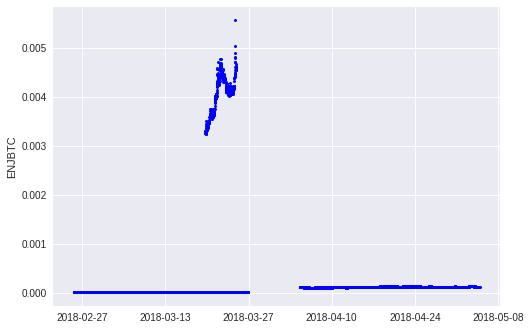

97
ENJETH
Writing ENJETH_15m_from_2018-2-25_to_2018-5-4.pkl


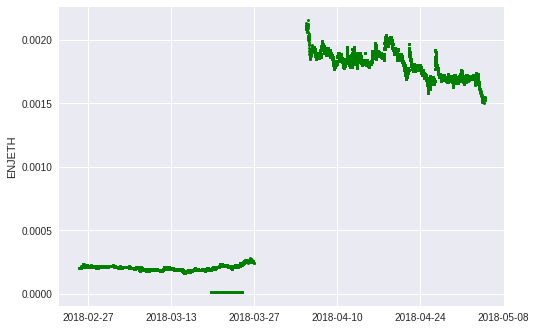

98
STORJBTC
Writing STORJBTC_15m_from_2018-2-25_to_2018-5-4.pkl


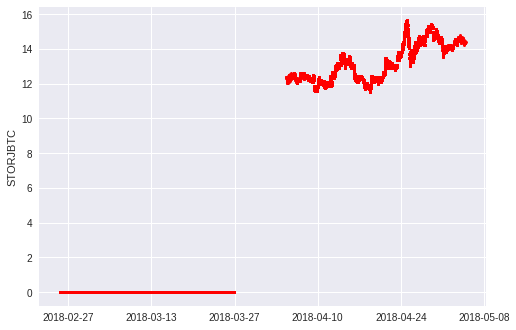

99
STORJETH
Writing STORJETH_15m_from_2018-2-25_to_2018-5-4.pkl


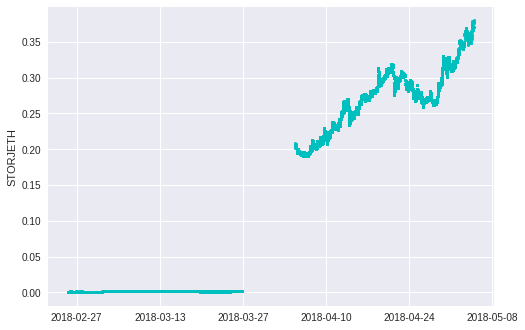

In [0]:
import sys
import os
import pickle
import pandas as pd
from datetime import datetime
from dateutil import tz

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri    
from rpy2.robjects.packages import importr

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

nC = len(mcolors.BASE_COLORS)

# colors for plotting
colors = "bgrcmykw"
color_len = len(colors)

# Auto-detect zones:
from_zone = tz.tzutc()
to_zone = tz.tzlocal()


# Binance data point type
tm = '15m' # Others: '1m', '5m', ''

dir = '/content/drive/Projects/Crypto/'
datadir = '/content/drive/Projects/Crypto/BinanceData/'
pickledir='/content/drive/Projects/Crypto/BinancePickleData/'

# Just load a RDA file to get the total number of coins N
base = importr('base')
os.chdir(datadir)
f = os.listdir(datadir)
rda_fn = f[1]
print(rda_fn)
base.load(rda_fn)
ro = robjects.r
N = len(ro['tcks'])
print("Number of Coins on Binance = " + N)


tm = '15m'
ftype = 'Binance_tickers_all_' + str(tm)

dictf = {}
df = None
df2 = None

# For each coin look at all the RData files, create time series data frame, save
# as python pkl file for further use
for k in range(1, N+1): # k represents coin index
  print(k)
  os.chdir(datadir)
  fnames = os.listdir(datadir)
  df = pd.DataFrame()
  coin_file_exists = False
  try:
    for f in fnames:
      if ftype in f:
        if coin_file_exists == True: # No need to deal with k-th coin
          break
          
        rda_fn = f
        base.load(rda_fn)     # Load the RData file
        #dfList = base.mget(base.ls())
    
        tcks = ro['tcks']
        coin = str(tcks[k][11][1]) # get k-th coin name
        
        # check coin name 
        key = coin
        n = len(key)
        type3 = key[(n-3):(n+1)]
        type4 = key[(n-4):(n+1)]
  
        # determine the folder name to save the data frame as pkl file
        if type4 == 'USDT':
          d = pickledir + 'USDT/'
        elif type3 == 'BTC':
          d = pickledir + 'BTC/'
        elif type3 == 'ETH':
          d = pickledir + 'ETH/'
        elif type3 == 'BNB':
          d = pickledir + 'BNB/'
        else:
          pass
       
        # changing to pickle data directory
        os.chdir(d)
        pklfnames = os.listdir(d)
        fn = ""
        for ff in pklfnames:
          if str(key + '_' + tm) in ff:
            fn = ff
            print(coin)
            print(fn + ' already exists.')
            break

        
        if os.path.exists(fn) and os.path.isfile(fn):
          print("Loading the pkl file in dictionary.")
          dictf[key] = pd.read_pickle(fn)
          coin_file_exists = True
          print("")
          break # break from the for loop dealing with RData files

                    
        # changing back to data directory
        os.chdir(datadir)
        
        time = tcks[k][0]
        ctime = []
        for t in time:
          ctime.append(t)
    
        ctime = pd.to_datetime(ctime, unit='s')

        open = tcks[k][1]
        high = tcks[k][2]
        low = tcks[k][3]
        close = tcks[k][4]
    
        if df.empty:
          d = {'Open': open, 'High' : high, 'Low' : low, 'Close' : close}
          df = pd.DataFrame(data=d, index=ctime)
          #df.index.name = 'Open_Time'
        else:
          d2 = {'Open': open, 'High' : high, 'Low' : low, 'Close' : close}
          df2 = pd.DataFrame(data=d2, index=ctime)
          #df2.index.name = 'Open_Time'

        df = pd.concat([df, df2])
        df.drop_duplicates()
        df.sort_index()
        # empty the data frame
        #df.drop(df.index, inplace=True)
        #df.iloc[0:0]
    
    if coin_file_exists == True:
      continue  # continue for the next coin
    
    try:
      # changing to pickle data directory
      print(coin)
      os.chdir(d)
      min_d = pd.DatetimeIndex([min(df.index.values)])
      max_d = pd.DatetimeIndex([max(df.index.values)])

      dmn = 'from' + '_' + str(min_d.year[0]) + '-' + str(min_d.month[0]) + '-' + str(min_d.day[0])
      dmx = 'to' + '_' + str(max_d.year[0]) + '-' + str(max_d.month[0]) + '-' + str(max_d.day[0])
      fn = str(key) + '_' + tm  +  '_' + dmn + '_' + dmx + '.pkl'
      print("Writing " + fn)
      df.to_pickle(fn)
      dictf[coin] = df
        
      plt.plot(df.index.values, df['Close'], 'o', markersize=3, color=colors[k % color_len])
      plt.ylabel(coin)
      plt.show()
    except:
      print("Unexpected error:", sys.exc_info()[0])
      raise  
  except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

Downloading and Writing file to Google Drive

https://medium.com/@likho2manish/dev-steps-to-google-colab-5c72779c0ae9

https://github.com/minegit/Colab/blob/master/LSTM_Colab.ipynb

In [0]:
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

def get_parent_folder(folder_name):
  page_token = None
  folder_array = []
  query = "name='%s' and mimeType='application/vnd.google-apps.folder'" % folder_name
  while True:
      response = drive_service.files().list(q=query,
                                          spaces='drive',
                                          fields='nextPageToken, files(id, name)',
                                          pageToken=page_token).execute()
      for file in response.get('files', []):
          # Process change
          #print (file.get('name'), file.get('id'))
          folder_array.append({"name" : file.get('name'), "id" : file.get('id')})
      page_token = response.get('nextPageToken', None)
      if page_token is None:
          break
  return folder_array

def get_files_from_parent(parent_id):
  page_token = None
  folder_array = dict()
  query = "'%s' in parents" % parent_id
  while True:
      response = drive_service.files().list(q=query,
                                          spaces='drive',
                                          fields='nextPageToken, files(id, name)',
                                          pageToken=page_token).execute()
      for file in response.get('files', []):
          # Process change
          #print (file.get('name'), file.get('id'))
          folder_array.update({file.get('name'):file.get('id')})
      page_token = response.get('nextPageToken', None)
      if page_token is None:
          break
  return folder_array

def get_file_buffer(file_id, verbose=0):
  from googleapiclient.http import MediaIoBaseDownload
  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    progress, done = downloader.next_chunk()
    if verbose:
      sys.stdout.flush()
      sys.stdout.write('\r')
      percentage_done = progress.resumable_progress * 100/progress.total_size
      sys.stdout.write("[%-100s] %d%%" % ('='*int(percentage_done), int(percentage_done)))
  downloaded.seek(0)
  return downloaded

In [2]:
dictf['LTCBTC'].head()
  

NameError: ignored

In [106]:
import os
import pickle

tm = '15m'

dir = '/content/drive/Projects/Crypto/'
datadir = '/content/drive/Projects/Crypto/BinanceData/'
pickledir='/content/drive/Projects/Crypto/BinancePickleData/'
os.chdir(pickledir)


for key in dictf.keys():
  n = len(key)
  type3 = key[(n-3):(n+1)]
  type4 = key[(n-4):(n+1)]
  
  if type4 == 'USDT':
    d = pickledir + 'USDT/'
  elif type3 == 'BTC':
    d = pickledir + 'BTC/'
  elif type3 == 'ETH':
    d = pickledir + 'ETH/'
  elif type3 == 'BNB':
    d = pickledir + 'BNB/'
  else:
    pass

  min_d = pd.DatetimeIndex([min(dictf[key].index.values)])
  max_d = pd.DatetimeIndex([max(dictf[key].index.values)])

  dmn = 'from' + '_' + str(min_d.year[0]) + '-' + str(min_d.month[0]) + '-' + str(min_d.day[0])
  dmx = 'to' + '_' + str(max_d.year[0]) + '-' + str(max_d.month[0]) + '-' + str(max_d.day[0])
  fn = d + str(key) + '_' + tm  +  '_' + dmn + '_' + dmx
  
  print(fn)
  try:
    save_obj(dictf[key], fn)
  except:
    print("Unexpected error:", sys.exc_info()[0])
    raise
os.chdir(dir)


/content/drive/Projects/Crypto/BinancePickleData/ETH/APPCETH_15m_from_2018-2-25_to_2018-5-4


TypeError: ignored

**LSTM Stock Price Prediction  https://github.com/NourozR/Stock-Price-Prediction-LSTM/blob/master/StockPricePrediction.py**

In [96]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM 

# FOR REPRODUCIBILITY
np.random.seed(7)

Using TensorFlow backend.


In [97]:
# Get the dataset

dataset = dictf['ETHUSDT']
#dataset = df.reindex(index = df.index[::-1])

dataset.head()

,Close,High,Low,Open
2018-04-15 16:45:00,522.38,524.29,521.31,523.02
2018-04-15 17:00:00,523.18,524.00,522.38,523.30
2018-04-15 17:15:00,524.77,525.00,522.93,523.18
2018-04-15 17:30:00,527.37,528.50,524.01,524.77
2018-04-15 17:45:00,526.88,527.69,525.93,527.35


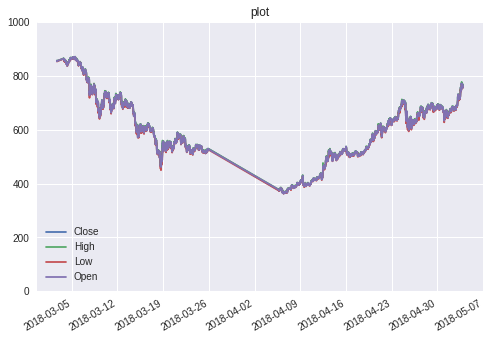

In [99]:
# interpolation for missing data

dataset = dictf['ETHUSDT']
dataset = dataset[dataset.index.duplicated()]
dataset = dataset.sort_index()


times = dataset.index.values
tN = len(times)
init_time = times[0]
end_time = times[tN-1]
#print(init_time)
times_all = pd.date_range(start = init_time, end = end_time, freq='15Min')

for t in times_all:
  if t not in dataset.index :   
    dataset.loc[t] = [None for n in range(4)]
  else:
    pass

#print(dataset.shape)


# interpolation methods
methods = ['linear'  , 'time'                 , 'index'            , 'values'      , 'nearest' , 'zero'      ,
           'slinear' , 'quadratic'            , 'cubic'            , 'barycentric' , 'krogh'   , 'polynomial', 
           'spline'  , 'piecewise_polynomial' , 'from_derivatives' , 'pchip'       , 'akima']

#for m in methods:
dataset = dataset.interpolate(method=methods[14])
ax = dataset.plot(title='plot')
ax.set_ylim(0, 1000)
plt.savefig('usdt_eth.pdf')
plt.show()

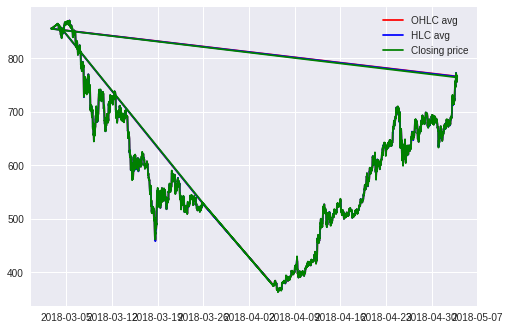

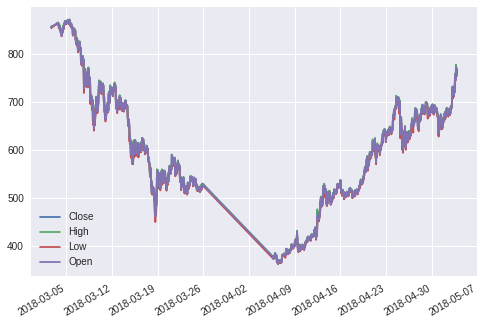

In [102]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = dataset.index.values#np.arange(1, len(dataset) + 1, 1)

# TAKING DIFFERENT INDICATORS FOR PREDICTION
OHLC_avg = dataset.mean(axis = 1)
HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]

# PLOTTING ALL INDICATORS IN ONE PLOT
plt.plot(obs, OHLC_avg, marker = '+', markersize=3, color = 'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg, marker = '+', markersize=3, color = 'b', label = 'HLC avg')
plt.plot(obs, close_val, marker = '+', markersize=3, color = 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.show()

dataset.plot()

In [0]:
# FUNCTION TO CREATE 1D DATA INTO TIME SERIES DATASET
def new_dataset(dataset, step_size):
	data_X, data_Y = [], []
	for i in range(len(dataset)-step_size-1):
		a = dataset[i:(i+step_size), 0]
		data_X.append(a)
		data_Y.append(dataset[i + step_size, 0])
	return np.array(data_X), np.array(data_Y)


In [0]:
# PREPARATION OF TIME SERIES DATASE
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)

# TRAIN-TEST SPLIT
train_OHLC = int(len(OHLC_avg) * 0.75)
test_OHLC = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = new_dataset(train_OHLC, 1)
testX, testY = new_dataset(test_OHLC, 1)

# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1

In [105]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adagrad') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
 - 159s - loss: 8.4280e-04
Epoch 2/5
 - 156s - loss: 2.8998e-05
Epoch 3/5
 - 156s - loss: 1.9621e-05
Epoch 4/5
 - 156s - loss: 1.9151e-05
Epoch 5/5
 - 156s - loss: 1.9086e-05


In [0]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
#print(trainPredict)

# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))

# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

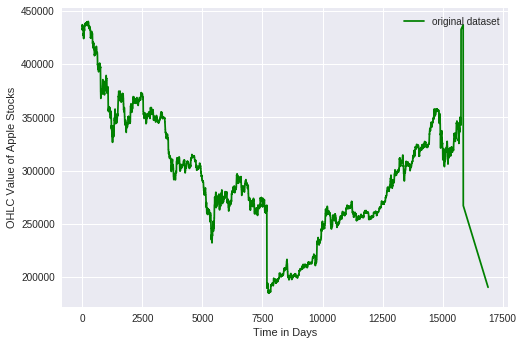

In [176]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

# DE-NORMALIZING MAIN DATASET 
OHLC_avg = scaler.inverse_transform(OHLC_avg)

# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(OHLC_avg, 'g', label = 'original dataset')
#plt.plot(trainPredictPlot, 'r', label = 'training set')
#plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value')
plt.show()

In [0]:
# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print "Last Day Value:", np.asscalar(last_val)
print "Next Day Value:", np.asscalar(last_val*next_val)
# print np.append(last_val, next_val)

Last Day Value: 0.0635383576155
Next Day Value: 0.0671514421701


# **Neural networks for algorithmic trading. Simple time series forecasting**

---



https://medium.com/machine-learning-world/neural-networks-for-algorithmic-trading-part-one-simple-time-series-forecasting-f992daa1045a

In [0]:
# Covert rpy2 data objects to pandas data frame
df = tcks[0]
a = ro.colnames(df)

import pandas as pd
import numpy as np

#print(ro.head(tcks[0][1:6]))
cols = []
for i, c in enumerate(a[0:6]):
  cols.append(c)
adf = np.array(df[0:6])
adf = adf.T

# open_time as index in pandas data frame
idx = pd.to_datetime(adf[:,0], unit='s')

pdf = pd.DataFrame(adf, index=idx, columns=cols)
pdf.columns = ['Open_time', 'Open', 'High', 'Low', 'Close', 'Volume']
pdf.index.name = 'Date'
print(pdf.head())
#print(pdf.index.values)
pdf.iloc[:,1:6].to_csv('table2.csv')

               Open_time      Open      High       Low     Close    Volume
Date                                                                      
2017-07-14  1.499990e+09  0.080000  0.091033  0.080000  0.090993  1942.057
2017-07-15  1.500077e+09  0.090993  0.093699  0.087127  0.087635  4013.066
2017-07-16  1.500163e+09  0.087508  0.087635  0.075591  0.082241  8904.158
2017-07-17  1.500250e+09  0.082368  0.088394  0.081699  0.087537  6650.933
2017-07-18  1.500336e+09  0.087831  0.109068  0.084777  0.107732  7245.741



Ciao, people!

This is first part of my experiments on application of deep learning to finance, in particular to algorithmic trading.
I want to implement trading system from scratch based only on deep learning approaches, so for any problem we have here (price prediction, trading strategy, risk management) we gonna use different variations of artificial neural networks (ANNs) and check how well they can handle this.

In this, first part, I want to show how MLPs, CNNs and RNNs can be used for financial time series prediction. In this part we are not going to use any feature engineering. Let's just consider historical dataset of S&P500 index price movements. We have information from 2050 to 2016 about open, close, high, low prices for every day in the year and volume of trades. First, we will try just to predict close price in the end of the next day, second, we will try to predict return (close price - open price).

We will consider our problem as 1) regression problem (trying to forecast exactly close price or return next day) 2) binary classification problem (price will go up [1; 0] or down [0; 1]). 

In [0]:
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, classification_report
import matplotlib.pylab as plt
import datetime as dt
import time

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.recurrent import LSTM, GRU
from keras.layers import Convolution1D, MaxPooling1D

%matplotlib inline  

Using TensorFlow backend.


In [0]:
dir = '/content/drive/Projects/Crypto/Deep-Trading/simple_forecasting'
os.chdir(dir)

#f_name = 'table.csv'
f_name = 'table2.csv'

def load_snp_returns():
    f = open(f_name, 'rb').readlines()[1:]
    raw_data = []
    raw_dates = []
    for line in f:
        try:
            open_price = float(line.split(',')[1])
            close_price = float(line.split(',')[4])
            raw_data.append(close_price - open_price)
            raw_dates.append(line.split(',')[0])
        except:
            continue

    return raw_data[::-1], raw_dates[::-1]


def load_snp_close():
    f = open(f_name, 'rb').readlines()[1:]
    raw_data = []
    raw_dates = []
    for line in f:
        try:
            close_price = float(line.split(',')[4])
            raw_data.append(close_price)
            raw_dates.append(line.split(',')[0])
        except:
            continue

    return raw_data, raw_dates


def split_into_chunks(data, train, predict, step, binary=True, scale=True):
    X, Y = [], []
    for i in range(0, len(data), step):
        try:
            x_i = data[i:i+train]
            y_i = data[i+train+predict]
            
            # Use it only for daily return time series
            if binary:
                if y_i > 0.:
                    y_i = [1., 0.]
                else:
                    y_i = [0., 1.]

                if scale: x_i = preprocessing.scale(x_i)
                
            else:
                if i+train > len(data) or i+train+predict > len(data):
                  break
                timeseries = np.array(data[i:(i+train+predict)])
                if scale: timeseries[i:(i+train)] = preprocessing.scale(timeseries[i:(i+train)])
                x_i = timeseries[:-1]
                y_i = timeseries[-1]
            
            X.append(x_i)
            Y.append(y_i)
    
        except Exception as e:
            #print(e)
            break
        
    return X, Y


def shuffle_in_unison(a, b):
    # courtsey http://stackoverflow.com/users/190280/josh-bleecher-snyder
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b


def create_Xt_Yt(X, y, percentage=0.8):
    idx = int(len(X) * percentage)
    X_train = X[0:idx]
    Y_train = y[0:idx]
    
    X_train, Y_train = shuffle_in_unison(X_train, Y_train)

    X_test = X[idx:]
    Y_test = y[idx:]

    return X_train, X_test, Y_train, Y_test

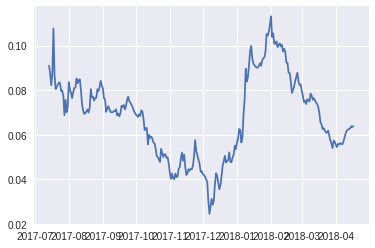

In [0]:
import matplotlib.pyplot as plt

#load from table.csv
timeseries, dates = load_snp_close()
dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]


#timeseries = pdf['close']
#dates = pdf.index.values

fig = plt.figure()
plt.plot(dates, timeseries)
plt.show()

In [0]:
TRAIN_SIZE = 20
TARGET_TIME = 1
LAG_SIZE = 1
EMB_SIZE = 1

X, Y = split_into_chunks(timeseries, TRAIN_SIZE, TARGET_TIME, LAG_SIZE, binary=False, scale=False)
X, Y = np.array(X), np.array(Y)
X_train, X_test, Y_train, Y_test = create_Xt_Yt(X, Y, percentage=0.9)
print(X_train[1:5,])
print(Y_train[1:5,])

Xp, Yp = split_into_chunks(timeseries, TRAIN_SIZE, TARGET_TIME, LAG_SIZE, binary=False, scale=False)
Xp, Yp = np.array(Xp), np.array(Yp)
X_trainp, X_testp, Y_trainp, Y_testp = create_Xt_Yt(Xp, Yp, percentage=0.9)


[[-6.0100e-04 -6.2300e-04 -2.2450e-03 -5.7400e-03  2.1670e-03  6.2970e-03
   5.3500e-03  2.0890e-03 -5.7750e-03  1.3635e-02  6.6920e-03  1.0496e-02
   2.2380e-03 -5.8650e-03 -3.6400e-04  4.3000e-03  1.8930e-03  2.7810e-03
  -1.4740e-03  4.1060e-03]
 [-1.0010e-03  4.2100e-04 -2.0910e-03 -9.1800e-04 -4.2780e-03 -2.5020e-03
  -1.3860e-03 -6.2500e-04 -8.7300e-04 -1.0820e-03  7.7700e-04 -1.9060e-03
  -8.7700e-04  3.4630e-03 -7.6400e-04 -2.8600e-04  2.1160e-03 -1.4090e-03
   5.5200e-04 -2.8250e-03]
 [ 3.2930e-03 -5.8310e-03 -8.3210e-03 -1.4250e-03 -9.7400e-04 -7.9600e-04
  -4.1900e-04 -1.2870e-03  2.7600e-04 -3.5760e-03 -1.8600e-03 -1.8000e-03
  -2.0980e-03 -4.9000e-03  6.8090e-03  4.4330e-03  1.6790e-03 -3.6000e-05
   7.4600e-04 -7.0300e-04]
 [-2.1010e-03 -1.3860e-03 -2.1500e-03 -2.1680e-03  8.8100e-04 -7.7000e-05
  -9.2400e-04 -1.0010e-03  4.2100e-04 -2.0910e-03 -9.1800e-04 -4.2780e-03
  -2.5020e-03 -1.3860e-03 -6.2500e-04 -8.7300e-04 -1.0820e-03  7.7700e-04
  -1.9060e-03 -8.7700e-04]]
[ 0

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

model = Sequential()
model.add(Dense(500, input_shape = (TRAIN_SIZE, )))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(250))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(optimizer='adam', 
              loss='mse')

model.fit(X_train, 
          Y_train, 
          nb_epoch=50, 
          batch_size = 128, 
          verbose=1, 
          validation_split=0.1)
score = model.evaluate(X_test, Y_test, batch_size=128)
print score

2.9713203e-07


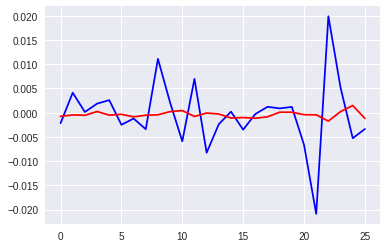

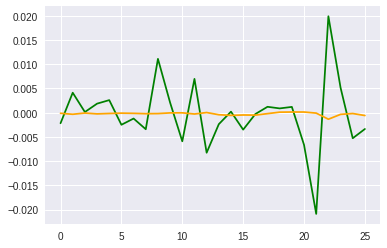

In [0]:
params = []
for xt in X_testp:
    xt = np.array(xt)
    mean_ = xt.mean()
    scale_ = xt.std()
    params.append([mean_, scale_])

#print(params[1:5])
predicted = model.predict(X_test)
new_predicted = []

for pred, par in zip(predicted, params):
    a = pred*par[1]
    a += par[0]
    new_predicted.append(a)
    

mse = mean_squared_error(predicted, new_predicted)
print mse

try:
    fig = plt.figure()#figsize=(width, height))
    plt.plot(Y_test, color='blue') # BLUE - trained RESULT
    plt.plot(predicted, color='red') # RED - trained PREDICTION
    plt.show()
    fig = plt.figure()#figsize=(width, height))
    plt.plot(Y_testp, color='green') # GREEN - actual RESULT
    plt.plot(new_predicted, color='orange') # ORANGE - restored PREDICTION
    plt.show()
except Exception as e:
    print str(e)

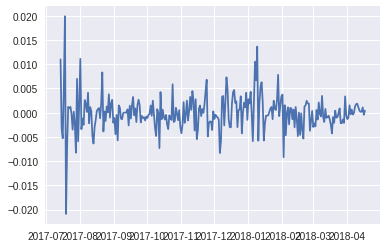

In [0]:
timeseries, dates = load_snp_returns()
dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
plt.plot(dates, timeseries)

In [0]:
TRAIN_SIZE = 20
TARGET_TIME = 1
LAG_SIZE = 1
EMB_SIZE = 1

X, Y = split_into_chunks(timeseries, TRAIN_SIZE, TARGET_TIME, LAG_SIZE, binary=True, scale=True)


X, Y = np.array(X), np.array(Y)
X_train, X_test, Y_train, Y_test = create_Xt_Yt(X, Y, percentage=0.9)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], EMB_SIZE))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], EMB_SIZE))

model = Sequential()
HIDDEN_RNN = 2
model.add(LSTM(input_shape = (EMB_SIZE,), input_dim=EMB_SIZE, output_dim=HIDDEN_RNN, return_sequences=True))
model.add(LSTM(input_shape = (EMB_SIZE,), input_dim=EMB_SIZE, output_dim=HIDDEN_RNN, return_sequences=False))

model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(optimizer='adam', 
              loss='mse',
              metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=2, return_sequences=True, input_shape=(None, 1))`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=2, return_sequences=False, input_shape=(None, 1))`
  import sys


In [0]:
model.fit(X_train, 
          Y_train, 
          nb_epoch=25, 
          batch_size = 128, 
          verbose=1, 
          validation_split=0.1)


score = model.evaluate(X_test, Y_test, batch_size=128)
print score

0.24846601
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
[0.004125 0.000142 0.001869 0.002597]


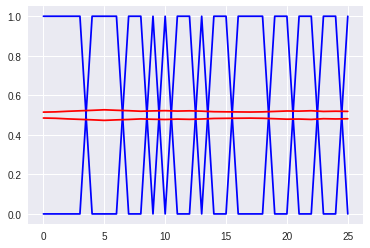

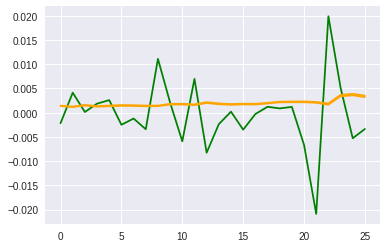

In [0]:
params = []
for xt in X_testp:
    xt = np.array(xt)
    mean_ = xt.mean()
    scale_ = xt.std()
    params.append([mean_, scale_])

predicted = model.predict(X_test)
new_predicted = []

for pred, par in zip(predicted, params):
    a = pred*par[1]
    a += par[0]
    new_predicted.append(a)
    

mse = mean_squared_error(predicted, new_predicted)
print mse

print(Y_test[1:5])
print(Y_testp[1:5])

try:
    fig = plt.figure()#figsize=(width, height))
    plt.plot(Y_test, color='blue') # BLUE - trained RESULT
    plt.plot(predicted, color='red') # RED - trained PREDICTION
    plt.show()
    fig = plt.figure()#figsize=(width, height))
    plt.plot(Y_testp[:100], color='green') # GREEN - actual RESULT
    plt.plot(new_predicted[:100], color='orange') # ORANGE - restored PREDICTION
    plt.show()
except Exception as e:
    print str(e)

In [0]:
timeseries, dates = load_snp_returns()
X, Y = split_into_chunks(timeseries, TRAIN_SIZE, TARGET_TIME, LAG_SIZE, binary=True)
X, Y = np.array(X), np.array(Y)
X_train, X_test, Y_train, Y_test = create_Xt_Yt(X, Y, percentage=0.9)

Y_train, Y_test = np.array([y.argmax() for y in Y_train]), np.array([y.argmax() for y in Y_test])


from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics, svm
from sklearn import linear_model

print 'Training...'

classifier = linear_model.LogisticRegression(C=1e-5)

classifier.fit(X_train, Y_train)

print 'Prediction...'
predicted = classifier.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(Y_test, predicted)))

Training...
Prediction...
Classification report for classifier LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.60      0.43      0.50        14
          1       0.50      0.67      0.57        12

avg / total       0.55      0.54      0.53        26




In [0]:
timeseries, dates = load_snp_returns()
X, Y = split_into_chunks(timeseries, TRAIN_SIZE, TARGET_TIME, LAG_SIZE, binary=True)
X, Y = np.array(X), np.array(Y)
X_train, X_test, Y_train, Y_test = create_Xt_Yt(X, Y, percentage=0.9)

Y_train, Y_test = np.array([y.argmax() for y in Y_train]), np.array([y.argmax() for y in Y_test])

from sklearn import metrics, svm
from sklearn import linear_model

print 'Training...'

classifier = svm.SVC()
classifier.fit(X_train, Y_train)

print 'Prediction...'
predicted = classifier.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(Y_test, predicted)))

Training...
Prediction...
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.44      0.29      0.35        14
          1       0.41      0.58      0.48        12

avg / total       0.43      0.42      0.41        26




In [0]:
timeseries, dates = load_snp_returns()
X, Y = split_into_chunks(timeseries, TRAIN_SIZE, TARGET_TIME, LAG_SIZE, binary=True)
X, Y = np.array(X), np.array(Y)
X_train, X_test, Y_train, Y_test = create_Xt_Yt(X, Y, percentage=0.9)

Y_train, Y_test = np.array([y.argmax() for y in Y_train]), np.array([y.argmax() for y in Y_test])

from sklearn import metrics
from sklearn import linear_model

print 'Training...'

classifier = RandomForestClassifier(n_estimators = 100,
                               n_jobs=4,
                               verbose=1)

classifier.fit(X_train, Y_train)

print 'Prediction...'
predicted = classifier.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(Y_test, predicted)))

Training...


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


Prediction...
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False):
             precision    recall  f1-score   support

          0       0.55      0.43      0.48        14
          1       0.47      0.58      0.52        12

avg / total       0.51      0.50      0.50        26




[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Training...
Prediction...
Classification report for classifier XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1):
             precision    recall  f1-score   support

          0       0.70      0.50      0.58        14
          1       0.56      0.75      0.64        12

avg / total       0.64      0.62      0.61        26




/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


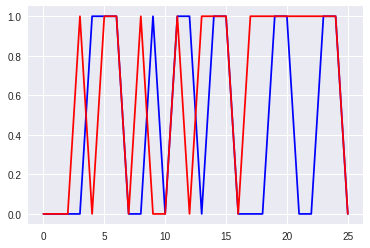

In [0]:
timeseries, dates = load_snp_returns()
X, Y = split_into_chunks(timeseries, TRAIN_SIZE, TARGET_TIME, LAG_SIZE, binary=True)
X, Y = np.array(X), np.array(Y)
X_train, X_test, Y_train, Y_test = create_Xt_Yt(X, Y, percentage=0.9)

Y_train, Y_test = np.array([y.argmax() for y in Y_train]), np.array([y.argmax() for y in Y_test])


from sklearn import metrics
from xgboost import XGBClassifier

print 'Training...'

classifier = XGBClassifier()

classifier.fit(X_train, Y_train)

print 'Prediction...'
predicted = classifier.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(Y_test, predicted)))

try:
    fig = plt.figure()#figsize=(width, height))
    plt.plot(Y_test, color='blue') # BLUE - trained RESULT
    plt.plot(predicted, color='red') # RED - trained PREDICTION
    plt.show()

except Exception as e:
    print str(e)

K-Means Clustering of Daily OHLC Bar Data 
https://www.quantstart.com/articles/k-means-clustering-of-daily-ohlc-bar-data

http://intelligenttradingtech.blogspot.com/2010/06/quantitative-candlestick-pattern.html

http://xiuxixiuxi.blogspot.com/2011/05/k-means-clustering-using-r.html

In [0]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [0]:
np.random.seed(1)

# Set the number of samples, the means and
# variances of each of the three simulated clusters
samples = 100
mu = [(7, 5), (8, 12), (1, 10)]
cov = [
    [[0.5, 0], [0, 1.0]],
    [[2.0, 0], [0, 3.5]],
    [[3, 0], [0, 5]],
]

# Generate a list of the 2D cluster points
norm_dists = [
    np.random.multivariate_normal(m, c, samples)
    for m, c in zip(mu, cov)
]
X = np.array(list(itertools.chain(*norm_dists)))

In [0]:
# Apply the K-Means Algorithm for k=3, which is
# equal to the number of true Gaussian clusters
km3 = KMeans(n_clusters=3)
km3.fit(X)
km3_labels = km3.labels_

# Apply the K-Means Algorithm for k=4, which is
# larger than the number of true Gaussian clusters
km4 = KMeans(n_clusters=4)
km4.fit(X)
km4_labels = km4.labels_

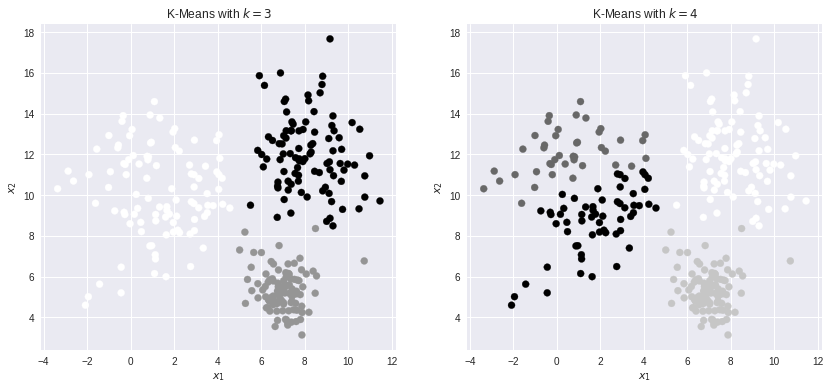

In [0]:
# Create a subplot comparing k=3 and k=4
# for the K-Means Algorithm
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.scatter(X[:, 0], X[:, 1], c=km3_labels.astype(np.float))
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title("K-Means with $k=3$")
ax2.scatter(X[:, 0], X[:, 1], c=km4_labels.astype(np.float))
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.set_title("K-Means with $k=4$")
plt.show()

In [0]:
# ohlc_clustering.py

import copy
import datetime

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.dates import (
    DateFormatter, WeekdayLocator, DayLocator, MONDAY
)
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from sklearn.cluster import KMeans

In [0]:
def get_open_normalised_prices(symbol, start, end):
    """
    Obtains a pandas DataFrame containing open normalised prices
    for high, low and close for a particular equities symbol
    from Yahoo Finance. That is, it creates High/Open, Low/Open
    and Close/Open columns.
    """
    df = web.DataReader(symbol, "yahoo", start, end)
    df["H/O"] = df["High"]/df["Open"]
    df["L/O"] = df["Low"]/df["Open"]
    df["C/O"] = df["Close"]/df["Open"]
    df.drop(
        [
            "Open", "High", "Low",
            "Close", "Volume", "Adj Close"
        ],
        axis=1, inplace=True
    )
    return df

In [0]:
def plot_candlesticks(data, since):
    """
    Plot a candlestick chart of the prices,
    appropriately formatted for dates
    """
    # Copy and reset the index of the dataframe
    # to only use a subset of the data for plotting
    df = copy.deepcopy(data)
    df = df[df['dates'] >= since]
    df.reset_index(inplace=True)
    df['date_fmt'] = df['dates'].apply(
        lambda date: mdates.date2num(date.to_pydatetime())
    )

    # Set the axis formatting correctly for dates
    # with Mondays highlighted as a "major" tick
    mondays = WeekdayLocator(MONDAY)
    alldays = DayLocator()
    weekFormatter = DateFormatter('%b %d')
    fig, ax = plt.subplots(figsize=(16,4))
    fig.subplots_adjust(bottom=0.2)
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(weekFormatter)

    # Plot the candlestick OHLC chart using black for
    # up days and red for down days
    df['Open'] = df['open_price']
    df['High'] = df['high_price']
    df['Low']  = df['low_price']
    df['Close']= df['close_price']
    
    csticks = candlestick_ohlc(
        ax, df[
            ['date_fmt', 'Open', 'High', 'Low', 'Close']
        ], width=0.6
    )
    ax.set_axis_bgcolor((1,1,0.9))
    ax.xaxis_date()
    plt.setp(
        plt.gca().get_xticklabels(),
        rotation=45, horizontalalignment='right'
    )
    plt.show()
    

    

In [0]:
def plot_3d_normalised_candles(data):
    """
    Plot a 3D scatterchart of the open-normalised bars
    highlighting the separate clusters by colour
    """
    fig = plt.figure(figsize=(12, 9))
    ax = Axes3D(fig, elev=21, azim=-136)
    ax.scatter(
        data["H/O"], data["L/O"], data["C/O"],
        c=labels.astype(np.float)
    )
    ax.set_xlabel('High/Open')
    ax.set_ylabel('Low/Open')
    ax.set_zlabel('Close/Open')
    plt.show()

In [0]:
def plot_cluster_ordered_candles(data):
    """
    Plot a candlestick chart ordered by cluster membership
    with the dotted blue line representing each cluster
    boundary.
    """
    # Set the format for the axis to account for dates
    # correctly, particularly Monday as a major tick
    mondays = WeekdayLocator(MONDAY)
    alldays = DayLocator()
    weekFormatter = DateFormatter("")
    fig, ax = plt.subplots(figsize=(16,4))
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(weekFormatter)

    # Sort the data by the cluster values and obtain
    # a separate DataFrame listing the index values at
    # which the cluster boundaries change
    df = copy.deepcopy(data)
    df.sort_values(by="Cluster", inplace=True)
    df.reset_index(inplace=True)
    df["clust_index"] = df.index
    df["clust_change"] = df["Cluster"].diff()
    change_indices = df[df["clust_change"] != 0]

    # Plot the OHLC chart with cluster-ordered "candles"
    csticks = candlestick_ohlc(
        ax, df[
            ["clust_index", 'Open', 'High', 'Low', 'Close']
        ].values, width=0.6,
        colorup='#000000', colordown='#ff0000'
    )
    ax.set_axis_bgcolor((1,1,0.9))

    # Add each of the cluster boundaries as a blue dotted line
    for row in change_indices.iterrows():
        plt.axvline(
            row[1]["clust_index"],
            linestyle="dashed", c="blue"
        )
    plt.xlim(0, len(df))
    plt.setp(
        plt.gca().get_xticklabels(),
        rotation=45, horizontalalignment='right'
    )
    plt.show()

In [0]:
def create_follow_cluster_matrix(data):
    """
    Creates a k x k matrix, where k is the number of clusters
    that shows when cluster j follows cluster i.
    """
    data["ClusterTomorrow"] = data["Cluster"].shift(-1)
    data.dropna(inplace=True)
    data["ClusterTomorrow"] = data["ClusterTomorrow"].apply(int)
    sp500["ClusterMatrix"] = list(zip(data["Cluster"], data["ClusterTomorrow"]))
    cmvc = data["ClusterMatrix"].value_counts()
    clust_mat = np.zeros( (k, k) )
    for row in cmvc.iteritems():
        clust_mat[row[0]] = row[1]*100.0/len(data)
    print("Cluster Follow-on Matrix:")
    print(clust_mat)

TypeError: ignored

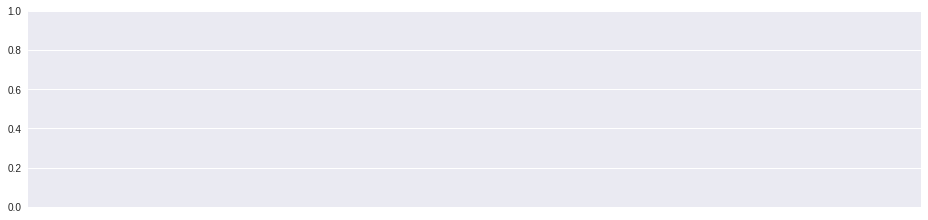

In [0]:
if __name__ == "__main__":
    # Obtain S&P500 pricing data from Yahoo Finance
    start = datetime.datetime(2017, 3, 16)
    end = datetime.datetime(2018, 3, 15)
    df = web.DataReader('SNAP', 'robinhood', start, end)
    #print(sp500.head())
    
    dates =[]
    for x in range(len(df)):
      newdate = df.index[x][1]
      dates.append(newdate)
    
    df['dates'] = dates
    #print(df['dates'])

    sp500 = df
    # Plot last year of price "candles"
    plot_candlesticks(sp500, datetime.datetime(2017, 3, 16))

    # Carry out K-Means clustering with five clusters on the
    # three-dimensional data H/O, L/O and C/O
    
     # Carry out K-Means clustering with five clusters on the
    # three-dimensional data H/O, L/O and C/O
    sp500_norm = get_open_normalised_prices(symbol, start, end)
    k = 5
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(sp500_norm)
    labels = km.labels_
    sp500["Cluster"] = labels

    # Plot the 3D normalised candles using H/O, L/O, C/O
    plot_3d_normalised_candles(sp500_norm)

    # Plot the full OHLC candles re-ordered
    # into their respective clusters
    plot_cluster_ordered_candles(sp500)

    # Create and output the cluster follow-on matrix
    create_follow_cluster_matrix(sp500)
    

# **Denoising Autoencoder**

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [0]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.6415 - val_loss: 0.5164
Epoch 2/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1985 - val_loss: 0.0433
Epoch 3/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0247 - val_loss: 0.0151
Epoch 4/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0117 - val_loss: 0.0094
Epoch 5/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0082 - val_loss: 0.0073
Epoch 6/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0067 - val_loss: 0.0063
Epoch 7/50
54272/60000 [==========================>...] - ETA: 0s - loss: 0.0059

60000/60000 [==============================] - 2s 29us/step - loss: 0.0059 - val_loss: 0.0057
Epoch 8/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.0054 - val_loss: 0.0053
Epoch 9/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0051 - val_loss: 0.0051
Epoch 10/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0049 - val_loss: 0.0049
Epoch 11/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0048 - val_loss: 0.0048
Epoch 12/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0047 - val_loss: 0.0047
Epoch 13/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0046 - val_loss: 0.0046
Epoch 14/50
25088/60000 [===========>..................] - ETA: 0s - loss: 0.0045

60000/60000 [==============================] - 2s 30us/step - loss: 0.0045 - val_loss: 0.0045
Epoch 15/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0045 - val_loss: 0.0045
Epoch 16/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0044 - val_loss: 0.0044
Epoch 17/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0044 - val_loss: 0.0044
Epoch 18/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0043 - val_loss: 0.0044
Epoch 19/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0043 - val_loss: 0.0044
Epoch 20/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0043 - val_loss: 0.0043
Epoch 21/50
21248/60000 [=========>....................] - ETA: 1s - loss: 0.0043

60000/60000 [==============================] - 2s 30us/step - loss: 0.0043 - val_loss: 0.0043
Epoch 22/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.0043 - val_loss: 0.0043
Epoch 23/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0042 - val_loss: 0.0043
Epoch 24/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.0042 - val_loss: 0.0043
Epoch 25/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0042 - val_loss: 0.0043
Epoch 26/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 27/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 28/50
21504/60000 [=========>....................] - ETA: 1s - loss: 0.0042

60000/60000 [==============================] - 2s 30us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 29/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 30/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 31/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 32/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 33/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0042
Epoch 34/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0042
Epoch 35/50
23296/60000 [==========>...................] - ETA: 1s - loss: 0.0041

60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0042
Epoch 36/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0042
Epoch 37/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0042
Epoch 38/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0042
Epoch 39/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0042
Epoch 40/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0042
Epoch 41/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0041
Epoch 42/50
23040/60000 [==========>...................] - ETA: 1s - loss: 0.0041

60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0041
Epoch 43/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0041
Epoch 44/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0041
Epoch 45/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0041
Epoch 46/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0041
Epoch 47/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0041
Epoch 48/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0041
Epoch 49/50
22528/60000 [==========>...................] - ETA: 1s - loss: 0.0041

60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0041
Epoch 50/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0041 - val_loss: 0.0041


In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

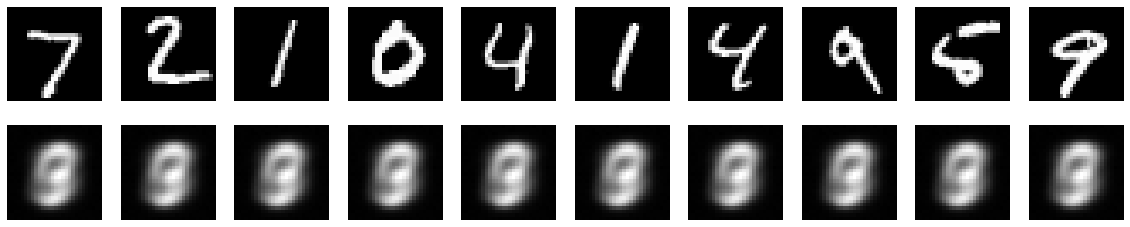

In [0]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)